In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

## 1. Introduzione al Clustering

Il clustering è una tecnica di apprendimento non supervisionato che permette di raggruppare dati simili. 

Alcuni algoritmi cercano istanze centrate attorno a un punto particolare, chiamato centroide. Altri cercano regioni continue di istanze densamente raggruppate: questi cluster possono assumere qualsiasi forma. Alcuni algoritmi sono gerarchici, cercando cluster di cluster.

Il clustering è utilizzato in un'ampia varietà di applicazioni, tra cui:

- Segmentazione
- Analisi dei dati
- Riduzione della dimensionalità
- Rilevamento di anomalie
- Motori di ricerca

## 2. K-Means: Teoria e Algoritmo

K-Means è un algoritmo semplice in grado di raggruppare un dataset molto rapidamente ed efficacemente, spesso in poche iterazioni.

Cercherà  di trovare il centro di ogni possibile gruppo di istanze e assegnerà ogni nuova istanza al gruppo più vicino.

### Come funziona K-Means:

1. Prima dobbiamo decidere il numero di cluster k che l'algoritmo deve trovare
2. Poi assegnare ogni istanza a uno dei k cluster
3. In base alle istanze assegnate, troviamo i centroidi per ogni cluster
4. È possibile assegnare nuove istanze al cluster il cui centroide è più vicino

Se si traccia i confini di decisione del cluster, si ottiene una tassellazione di Voronoi.


Iniziamo posizionando i centroidi casualmente (ad esempio, scegliendo k istanze a caso e utilizzando le loro posizioni come centroidi)
- Etichetta le istanze
- Aggiorna i centroidi
- Etichetta le istanze
- Aggiorna i centroidi
- E così via, fino a quando i centroidi smettono di muoversi.

**L'algoritmo è garantito convergere in un numero finito di passi** - potrebbe non convergere alla soluzione giusta

#### Passo 1: Setup e creazione del dataset

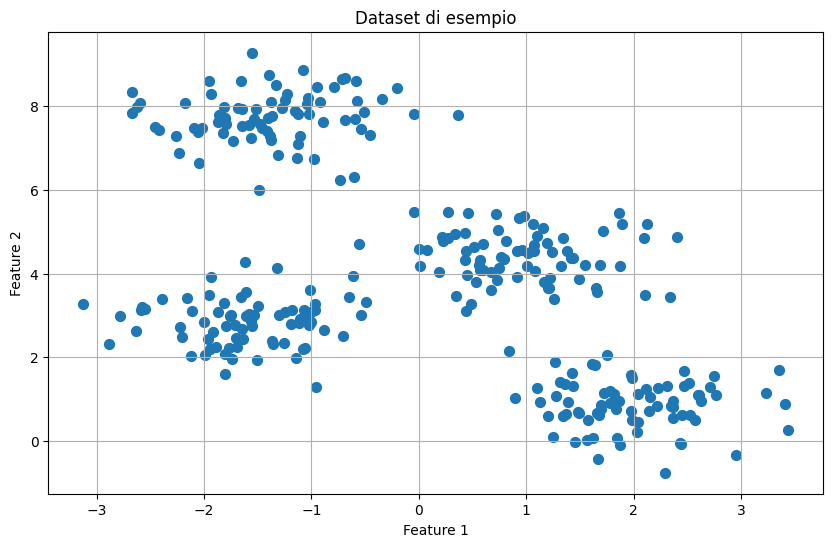

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Creiamo un dataset di esempio
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dataset di esempio')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Inizializziamo alcune variabili che useremo in più celle
k = 4  # Numero di cluster
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#C747A3']
max_iter = 6  # Numero massimo di iterazioni da visualizzare

#### Passo 2: Inizializzazione dei centroidi

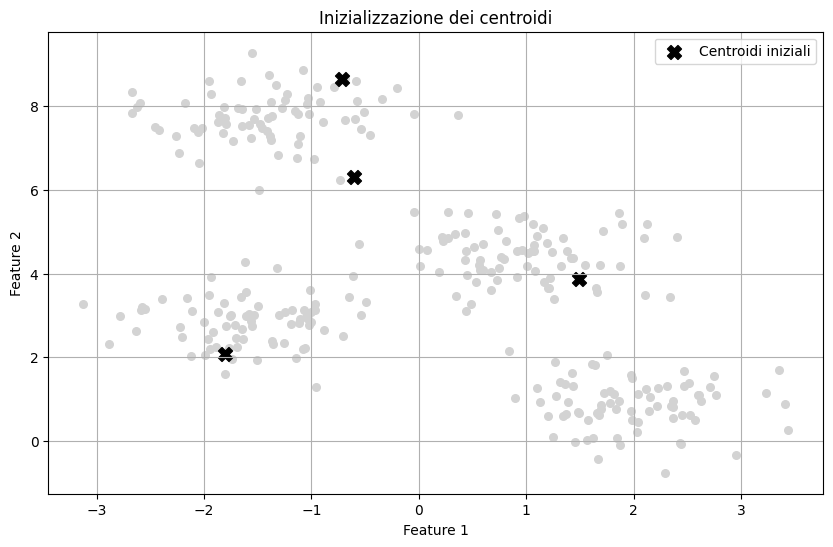

In [3]:
# Inizializziamo i centroidi casualmente scegliendo k punti dal dataset
np.random.seed(42)
random_idx = np.random.choice(len(X), k, replace=False)
centroids = X[random_idx]

# Visualizziamo il dataset e i centroidi iniziali
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, c='lightgray')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi iniziali')
plt.title('Inizializzazione dei centroidi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Passo 3: Prima iterazione - Calcolo delle distanze e assegnazione ai cluster

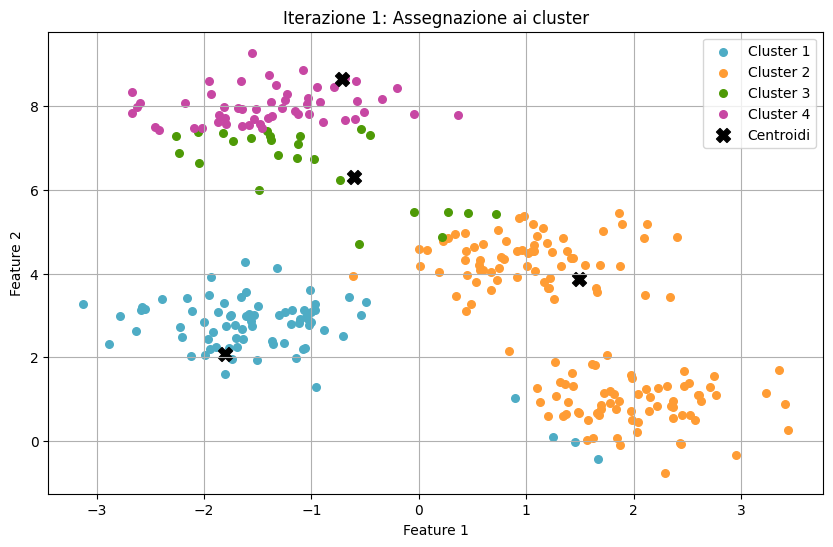

In [4]:
# Calcoliamo le distanze tra ogni punto e ogni centroide
distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
# Assegniamo ogni punto al cluster più vicino
labels = np.argmin(distances, axis=0)
# Visualizziamo i cluster formati
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi')
plt.title('Iterazione 1: Assegnazione ai cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Passo 4: Prima iterazione - Aggiornamento dei centroidi

In [5]:
# Calcoliamo i nuovi centroidi come media dei punti in ogni cluster
new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

1. `for j in range(k)` - Itera su tutti i cluster da 0 a k-1 (dove k è il numero di cluster)

2. Per ogni cluster j:
   - `labels == j` crea una maschera booleana che è True per tutti i punti dati assegnati al cluster j
   - `X[labels == j]` seleziona tutti i punti in X che appartengono al cluster j (usando la maschera booleana)
   - `.mean(axis=0)` calcola la media lungo l'asse 0, cioè la media per ogni caratteristica (feature) di tutti i punti selezionati

3. La list comprehension `[X[labels == j].mean(axis=0) for j in range(k)]` crea una lista di vettori, dove ogni vettore rappresenta le coordinate del centroide per un cluster

4. `np.array([...])` converte questa lista in un array NumPy

In pratica, calcola le nuove posizioni dei centroidi prendendo la media di tutti i punti attualmente assegnati a ciascun cluster. È un passaggio fondamentale dell'algoritmo K-means, che alterna l'assegnazione dei punti ai cluster più vicini e l'aggiornamento delle posizioni dei centroidi fino a convergenza.

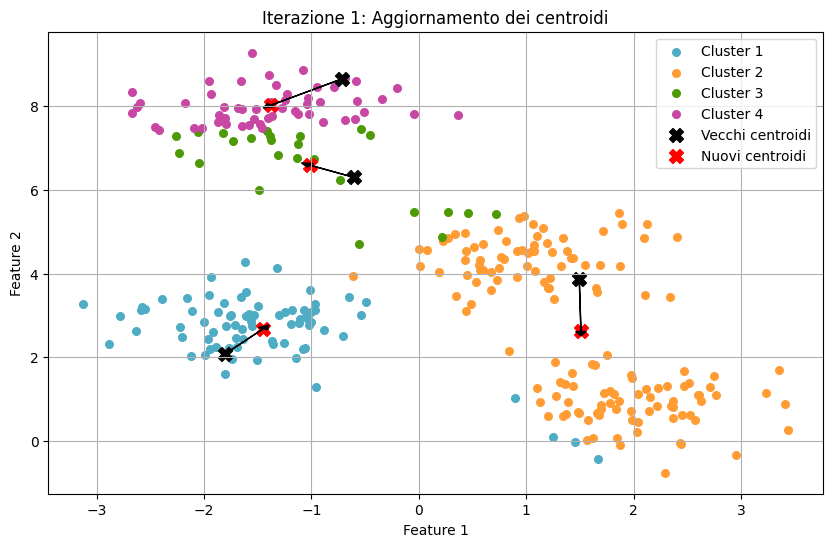

In [6]:

# Visualizziamo il movimento dei centroidi
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')

# Aggiungiamo i vecchi e nuovi centroidi
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Vecchi centroidi')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=100, c='red', label='Nuovi centroidi')

# Aggiungiamo le frecce che mostrano il movimento
for j in range(k):
    plt.arrow(centroids[j, 0], centroids[j, 1], 
             new_centroids[j, 0] - centroids[j, 0],
             new_centroids[j, 1] - centroids[j, 1],
             head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.title('Iterazione 1: Aggiornamento dei centroidi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Aggiorniamo i centroidi per la prossima iterazione
centroids = new_centroids.copy()

#### Passo 5: Seconda iterazione - Calcolo delle distanze e assegnazione ai cluster

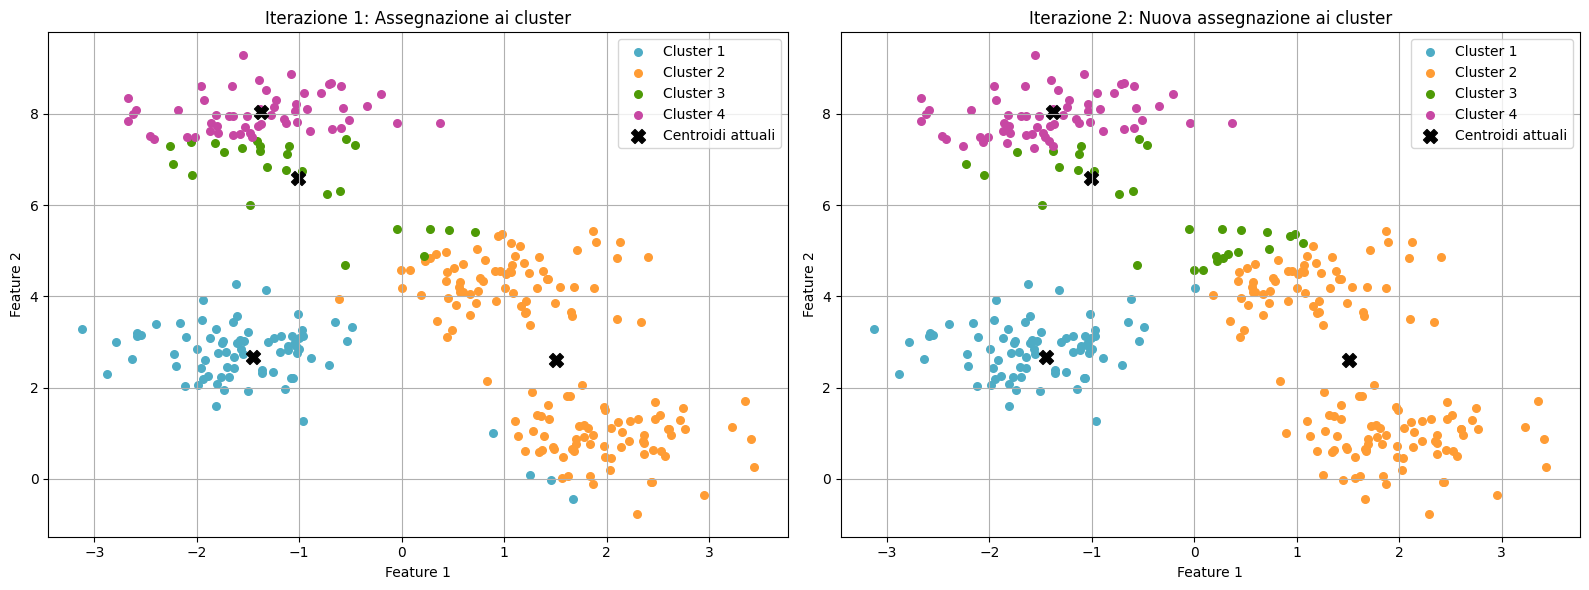

Punti che hanno cambiato cluster: 22 su 300 (7.3%)


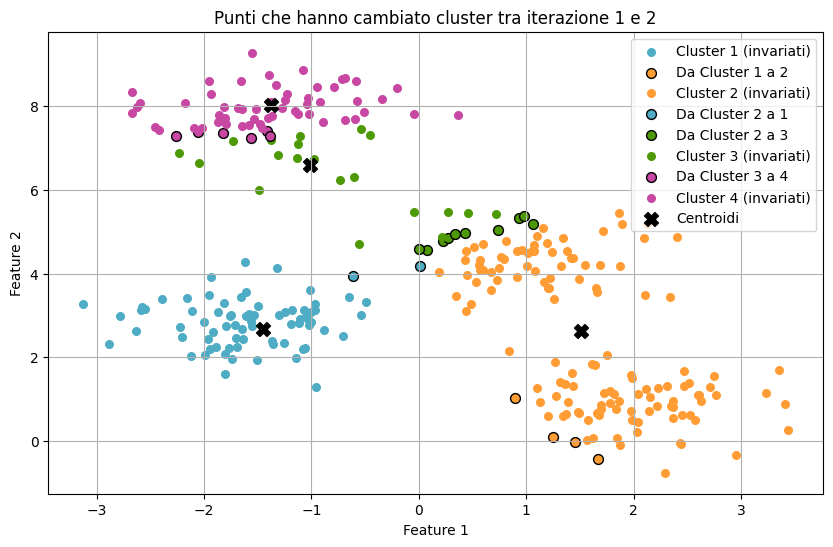

In [7]:
# Salviamo i label della prima iterazione per confronto
labels_iter1 = labels.copy()

# Calcoliamo le distanze tra ogni punto e ogni centroide aggiornati
distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

# Assegniamo ogni punto al cluster più vicino
labels_iter2 = np.argmin(distances, axis=0)

# Creiamo una figura con due subplot per confrontare la prima e la seconda iterazione
plt.figure(figsize=(16, 6))

# Subplot per la prima iterazione
plt.subplot(1, 2, 1)
for j in range(k):
    plt.scatter(X[labels_iter1 == j, 0], X[labels_iter1 == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi attuali')
plt.title('Iterazione 1: Assegnazione ai cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot per la seconda iterazione
plt.subplot(1, 2, 2)
for j in range(k):
    plt.scatter(X[labels_iter2 == j, 0], X[labels_iter2 == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi attuali')
plt.title('Iterazione 2: Nuova assegnazione ai cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Aggiorniamo labels per l'iterazione successiva
labels = labels_iter2.copy()

# Visualizziamo le differenze nell'assegnazione tra le due iterazioni
points_changed = np.sum(labels_iter1 != labels_iter2)
print(f"Punti che hanno cambiato cluster: {points_changed} su {len(X)} ({points_changed/len(X):.1%})")

# Visualizziamo i punti che hanno cambiato cluster
plt.figure(figsize=(10, 6))
for j in range(k):
    # Punti che non hanno cambiato cluster
    mask_unchanged = (labels_iter1 == j) & (labels_iter2 == j)
    plt.scatter(X[mask_unchanged, 0], X[mask_unchanged, 1], 
               s=30, c=colors[j], label=f'Cluster {j+1} (invariati)')
    
    # Punti che hanno cambiato cluster (evidenziati con contorno nero)
    for new_j in range(k):
        if new_j != j:
            mask_changed = (labels_iter1 == j) & (labels_iter2 == new_j)
            if np.any(mask_changed):
                plt.scatter(X[mask_changed, 0], X[mask_changed, 1], 
                           s=50, facecolors=colors[new_j], edgecolors='black', linewidth=1,
                           label=f'Da Cluster {j+1} a {new_j+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi')
plt.title('Punti che hanno cambiato cluster tra iterazione 1 e 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Passo 6: Seconda iterazione - Aggiornamento dei centroidi


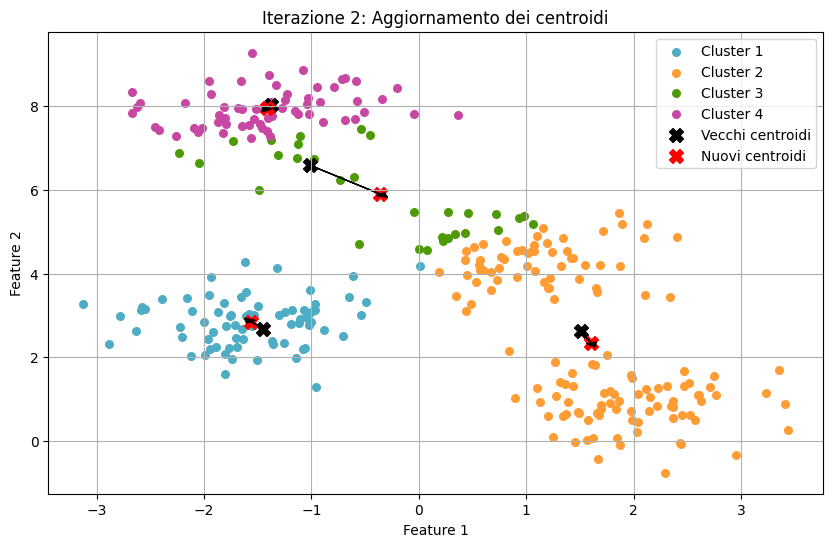

In [8]:
# Calcoliamo i nuovi centroidi come media dei punti in ogni cluster
new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

# Visualizziamo il movimento dei centroidi
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')

# Aggiungiamo i vecchi e nuovi centroidi
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Vecchi centroidi')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=100, c='red', label='Nuovi centroidi')

# Aggiungiamo le frecce che mostrano il movimento
for j in range(k):
    plt.arrow(centroids[j, 0], centroids[j, 1], 
             new_centroids[j, 0] - centroids[j, 0],
             new_centroids[j, 1] - centroids[j, 1],
             head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.title('Iterazione 2: Aggiornamento dei centroidi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Aggiorniamo i centroidi per la prossima iterazione
centroids = new_centroids.copy()

### Quando ci fermiamo con le iterazioni in K-Means? Possiamo continuare ad iterare
L'algoritmo K-Means prevede criteri di arresto specifici che determinano quando possiamo considerare completato il processo di clustering. Generalmente, l'algoritmo si ferma quando si verifica almeno una delle seguenti condizioni:


#### 1. Stabilità dei centroidi

La condizione più comune è quando i centroidi si stabilizzano, cioè quando il loro movimento tra un'iterazione e l'altra diventa minimo:

```python
# Dopo aver calcolato i nuovi centroidi
movement = np.sum((new_centroids - centroids)**2)
tolerance = 0.0001  # Soglia di tolleranza

if movement < tolerance:
    print(f"Convergenza raggiunta all'iterazione {iteration+1}. Movimento: {movement:.6f}")
    break  # Usciamo dal ciclo di iterazioni
```

#### 2. Nessun cambiamento nelle assegnazioni

Un'altra condizione è quando nessun punto cambia la propria assegnazione di cluster:

```python
# Memorizza le etichette precedenti
previous_labels = labels.copy()

# Calcola le nuove etichette
distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
labels = np.argmin(distances, axis=0)

# Controlla se ci sono cambiamenti nelle assegnazioni
if np.array_equal(labels, previous_labels):
    print(f"Nessun cambiamento nelle assegnazioni all'iterazione {iteration+1}")
    break

#### 3. Numero massimo di iterazioni

Per evitare cicli infiniti, si imposta sempre un numero massimo di iterazioni:

```python
max_iterations = 100
for iteration in range(max_iterations):
    # Codice per l'iterazione
    
    # Verifica dei criteri di arresto
    
    # Se arriva qui, continua con l'iterazione successiva

print(f"Algoritmo terminato dopo {iteration+1} iterazioni")

#### 4. Criterio di arresto basato sull'inerzia

$$Inerzia = \frac{1}{N} \sum_{i=1}^{k} \sum_{x_j \in C_i} |x_j - \mu_i|^2$$

Dove:

- k è il numero di cluster
- C_i è l'insieme delle istanze nel cluster i
- μ_i è il centroide del cluster i
- $||x_j - μ_i||^2$ è la distanza quadratica tra un'istanza e il suo centroide

#### Prossimi Step? continuiamo ad iterare -  Iterazioni successive con ciclo e criterio di arresto basato su stabilità e numero massimo di iterazioni

In [9]:
# Salviamo lo stato all'iterazione 3 (punti di partenza per i diversi criteri di arresto)
iteration_3_centroids = centroids.copy()
iteration_3_labels = labels.copy()

# Definiamo i parametri per il ciclo di iterazioni
max_iterations = 10
tolerance = 0.0001  # Soglia di tolleranza per la convergenza
starting_iteration = 3  # Iniziamo dalla terza iterazione (dopo i primi due passi)

# Memorizziamo i movimenti dei centroidi per ogni iterazione
movements = []

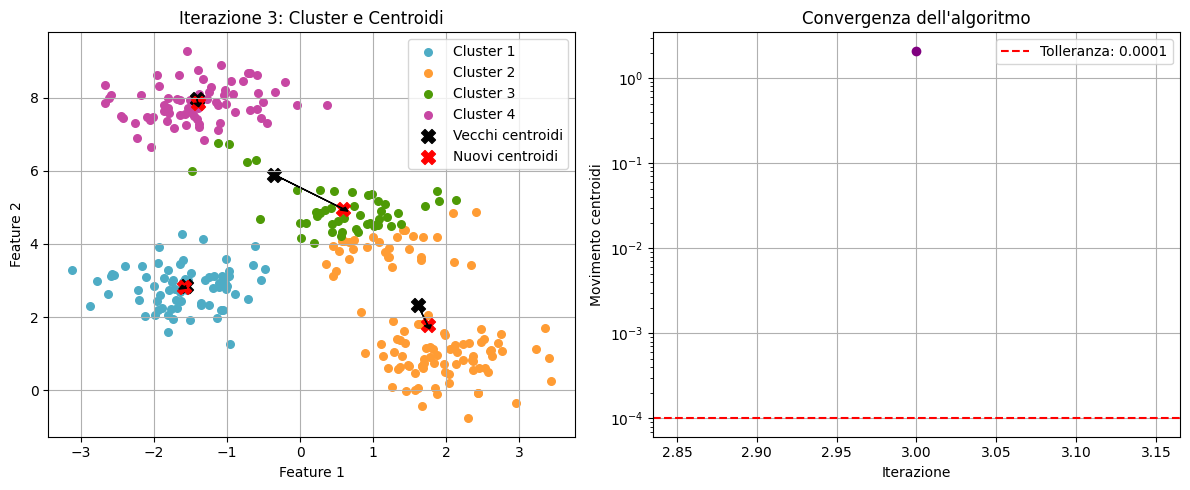

Iterazione 3, Movimento centroidi: 2.105098


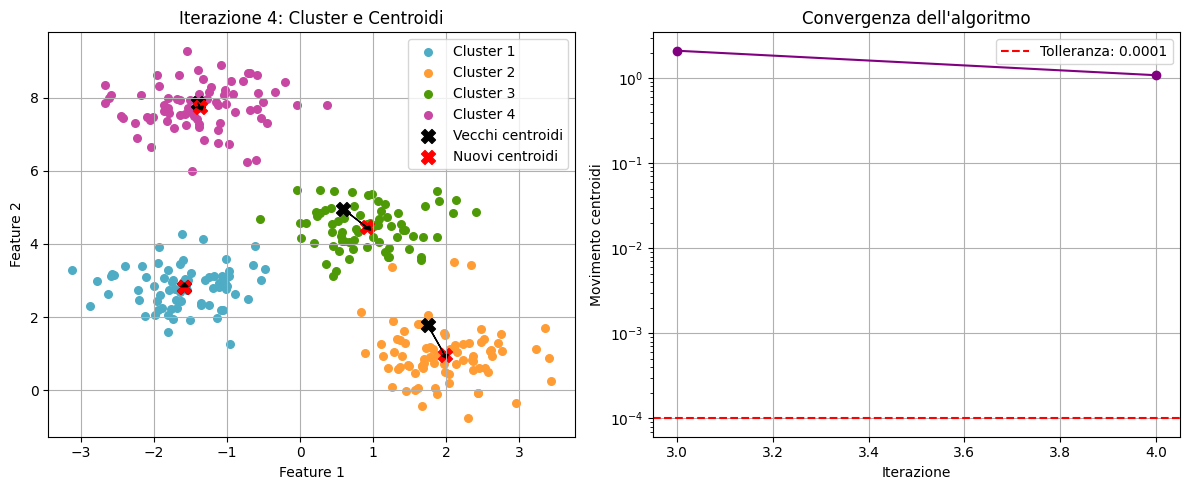

Iterazione 4, Movimento centroidi: 1.084191


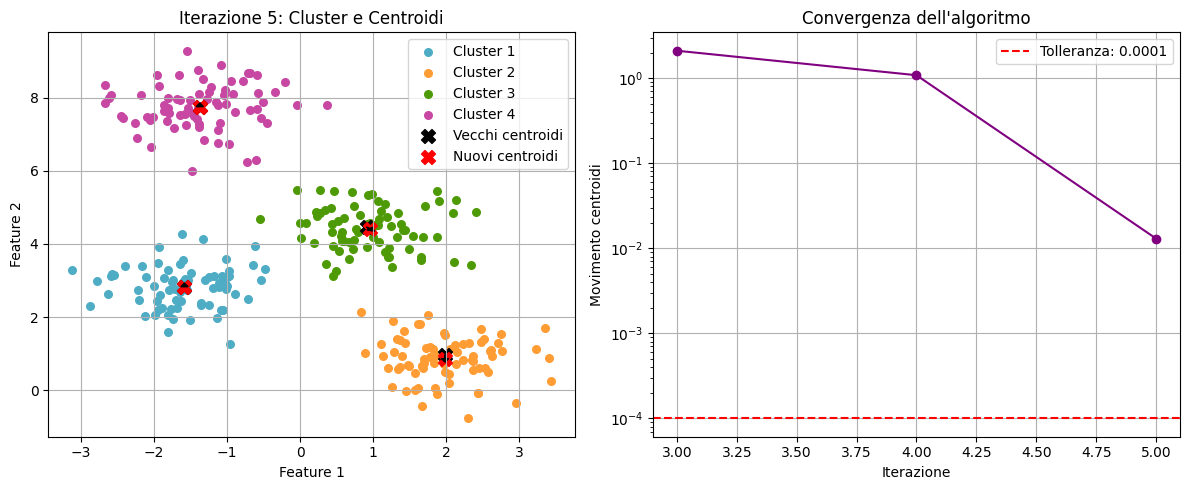

Iterazione 5, Movimento centroidi: 0.013014


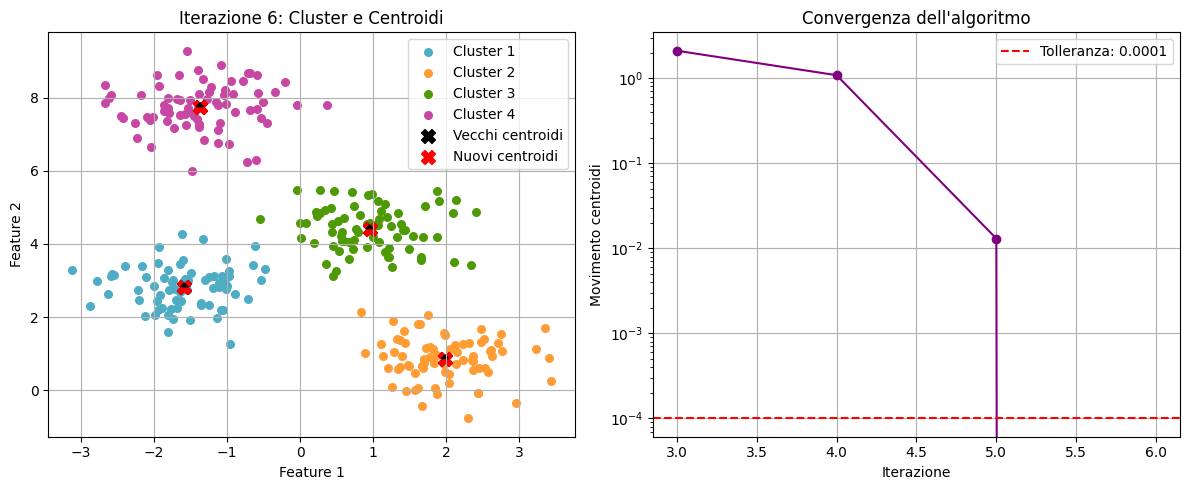

Iterazione 6, Movimento centroidi: 0.000000
Convergenza raggiunta all'iterazione 6!


In [10]:
# Eseguiamo il ciclo per le iterazioni successive
for iteration in range(starting_iteration, max_iterations):
    # 7.1 Calcolo delle distanze e assegnazione ai cluster
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    # 7.2 Aggiornamento dei centroidi
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    # 7.3 Calcolo del movimento dei centroidi
    movement = np.sum((new_centroids - centroids)**2)
    movements.append(movement)
    
    # 7.4 Visualizziamo lo stato attuale
    plt.figure(figsize=(12, 5))
    
    # Subplot per i cluster
    plt.subplot(1, 2, 1)
    for j in range(k):
        plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Vecchi centroidi')
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=100, c='red', label='Nuovi centroidi')
    
    # Aggiungiamo le frecce che mostrano il movimento
    for j in range(k):
        plt.arrow(centroids[j, 0], centroids[j, 1], 
                 new_centroids[j, 0] - centroids[j, 0],
                 new_centroids[j, 1] - centroids[j, 1],
                 head_width=0.1, head_length=0.1, fc='k', ec='k')
    
    plt.title(f'Iterazione {iteration}: Cluster e Centroidi')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    # Subplot per il grafico di convergenza
    plt.subplot(1, 2, 2)
    plt.plot(range(starting_iteration, iteration+1), movements, 'o-', color='purple')
    plt.axhline(y=tolerance, color='r', linestyle='--', label=f'Tolleranza: {tolerance}')
    plt.xlabel('Iterazione')
    plt.ylabel('Movimento centroidi')
    plt.title('Convergenza dell\'algoritmo')
    plt.yscale('log')  # Scala logaritmica per visualizzare meglio
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Iterazione {iteration}, Movimento centroidi: {movement:.6f}")
    
    # 7.5 Verifichiamo il criterio di arresto
    if movement < tolerance:
        print(f"Convergenza raggiunta all'iterazione {iteration}!")
        break
    
    # 7.6 Aggiorniamo i centroidi per la prossima iterazione
    centroids = new_centroids.copy()

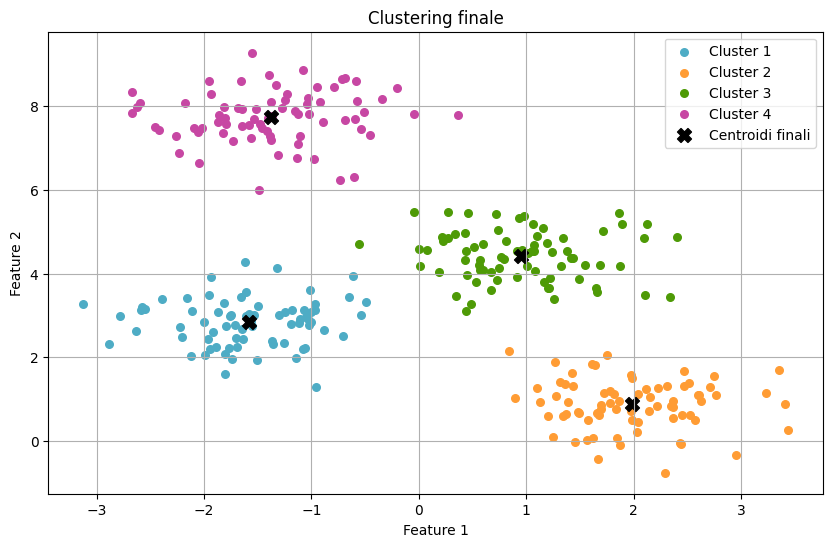

In [11]:
# 7.7 Visualizziamo il risultato finale
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi finali')
plt.title(f'Clustering finale')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Salviamo i risultati dell'approccio basato sul movimento dei centroidi per confrontarlo dopo
labels_movimento = labels.copy()
centroids_movimento = centroids.copy()
iterazioni_movimento = iteration - starting_iteration + 1  # Numero di iterazioni eseguite

#### Prossimi Step? Torniamo indietro e proviamo il criterio di arresto basato sui cambiamenti nelle assegnazioni dei cluster

In [13]:
# 8.1 Ripristiniamo lo stato all'iterazione 3 (punti di partenza)
centroids = iteration_3_centroids.copy()
labels = iteration_3_labels.copy()

# Definiamo i parametri per il ciclo di iterazioni
max_iterations = 10
starting_iteration = 3  # Iniziamo dalla terza iterazione

# Memorizziamo il numero di punti che cambiano cluster per ogni iterazione
label_changes = []

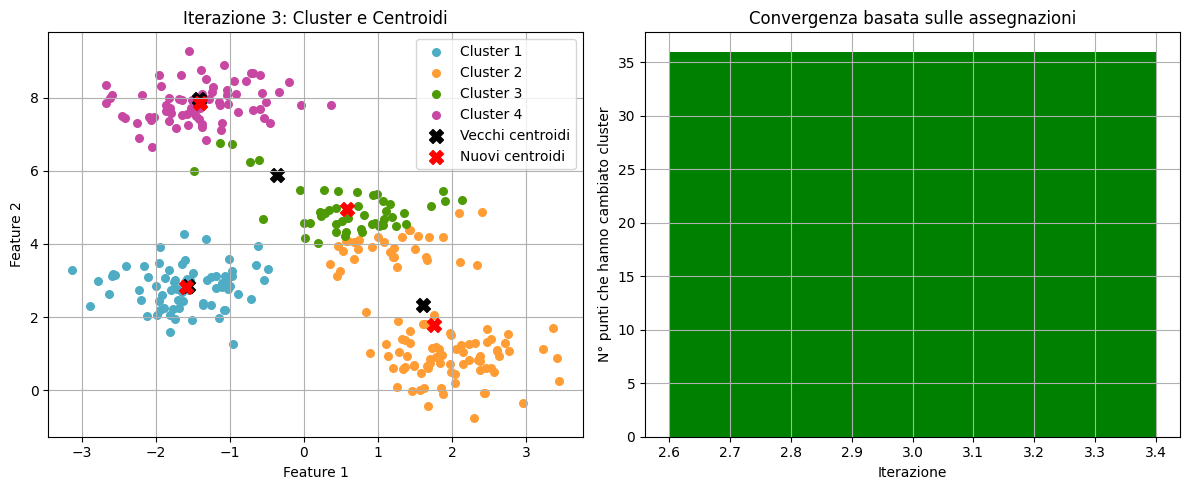

Iterazione 3, Punti che hanno cambiato cluster: 36


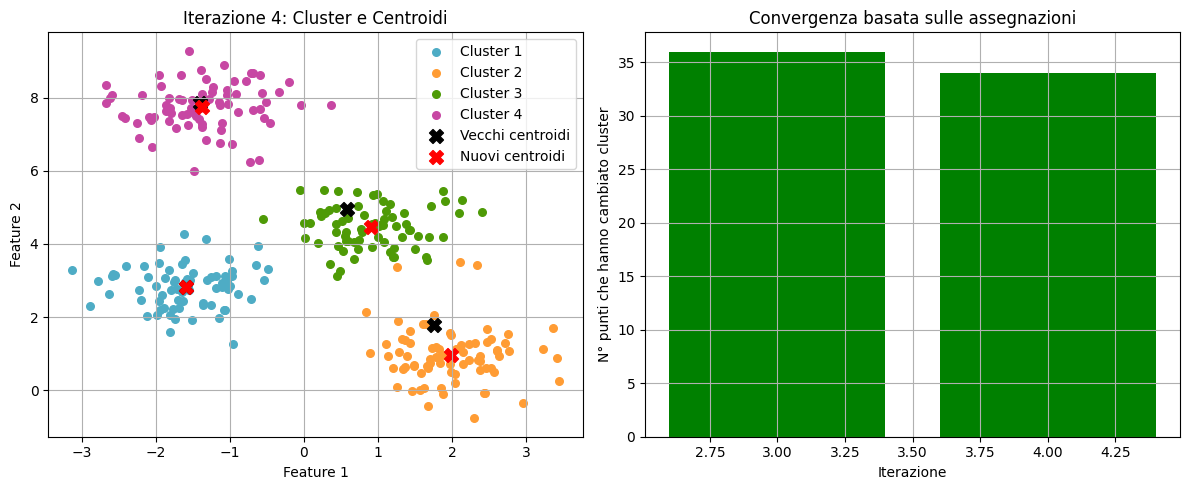

Iterazione 4, Punti che hanno cambiato cluster: 34


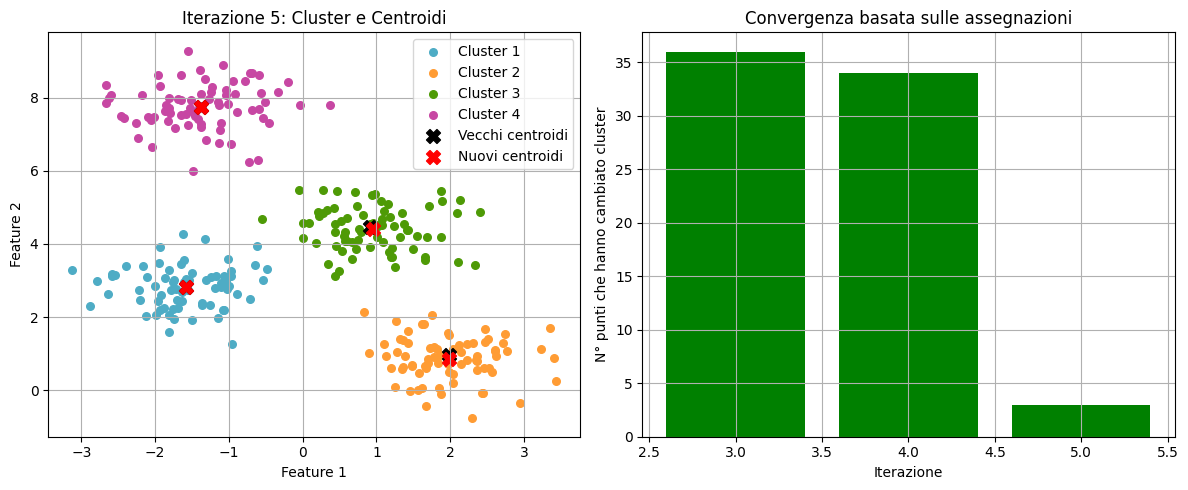

Iterazione 5, Punti che hanno cambiato cluster: 3


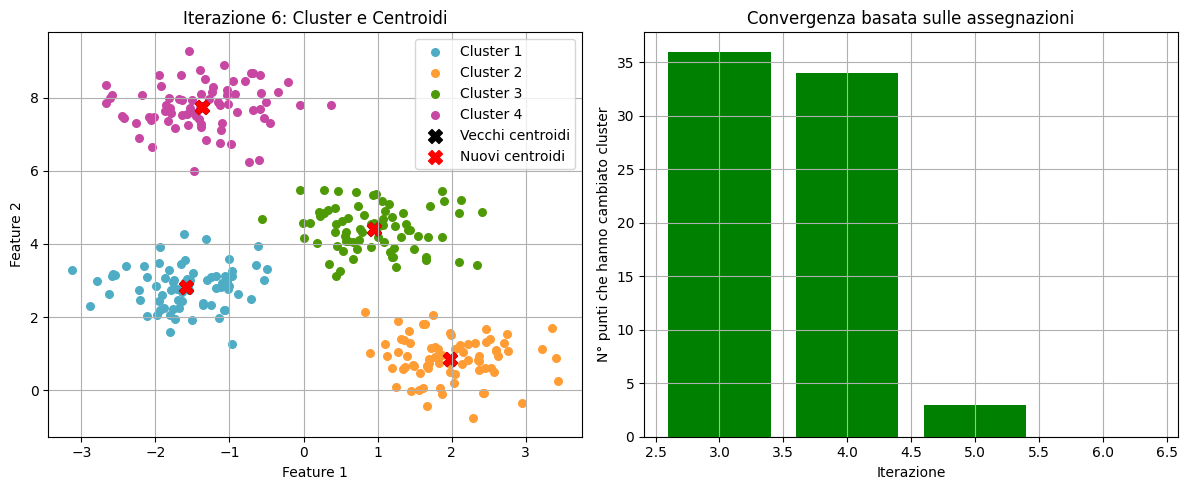

Iterazione 6, Punti che hanno cambiato cluster: 0
Convergenza raggiunta all'iterazione 6: nessun punto ha cambiato cluster!


In [14]:
# Eseguiamo il ciclo per le iterazioni successive
for iteration in range(starting_iteration, max_iterations):
    # 8.2 Salviamo le etichette precedenti per rilevare i cambiamenti
    previous_labels = labels.copy()
    
    # 8.3 Calcolo delle distanze e assegnazione ai cluster
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    # 8.4 Contiamo quanti punti hanno cambiato cluster
    label_change_count = np.sum(labels != previous_labels)
    label_changes.append(label_change_count)
    
    # 8.5 Aggiornamento dei centroidi
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    # 8.6 Visualizziamo lo stato attuale
    plt.figure(figsize=(12, 5))
    
    # Subplot per i cluster
    plt.subplot(1, 2, 1)
    for j in range(k):
        plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Vecchi centroidi')
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=100, c='red', label='Nuovi centroidi')
    
    plt.title(f'Iterazione {iteration}: Cluster e Centroidi')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    # Subplot per il grafico dei cambiamenti nelle assegnazioni
    plt.subplot(1, 2, 2)
    plt.bar(range(starting_iteration, iteration+1), label_changes, color='green')
    plt.xlabel('Iterazione')
    plt.ylabel('N° punti che hanno cambiato cluster')
    plt.title('Convergenza basata sulle assegnazioni')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Iterazione {iteration}, Punti che hanno cambiato cluster: {label_change_count}")
    
    # 8.7 Verifichiamo il criterio di arresto
    if label_change_count == 0:
        print(f"Convergenza raggiunta all'iterazione {iteration}: nessun punto ha cambiato cluster!")
        break
    
    # 8.8 Aggiorniamo i centroidi per la prossima iterazione
    centroids = new_centroids.copy()

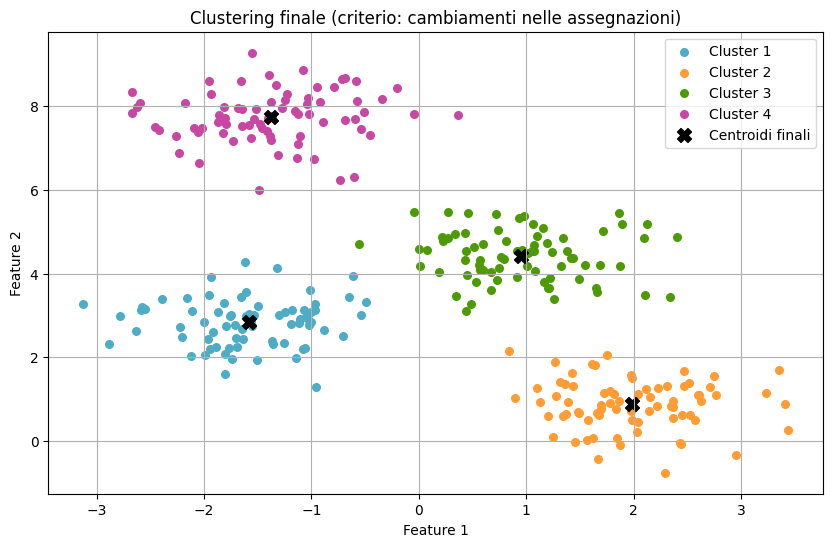

In [15]:
# 8.9 Visualizziamo il risultato finale
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi finali')
plt.title(f'Clustering finale (criterio: cambiamenti nelle assegnazioni)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


# Salviamo i risultati dell'approccio basato sulle assegnazioni
labels_assegnazioni = labels.copy()
centroids_assegnazioni = centroids.copy()
iterazioni_assegnazioni = iteration - starting_iteration + 1

#### Prossimi Step? Torniamo indietro e proviamo il criterio di arresto basato sull'inerzia

In [16]:
# 9.1 Ripristiniamo lo stato all'iterazione 3 (punti di partenza)
centroids = iteration_3_centroids.copy()
labels = iteration_3_labels.copy()

# Definiamo i parametri per il ciclo di iterazioni
max_iterations = 10
tolerance = 0.0001  # Soglia di tolleranza per la variazione dell'inerzia
starting_iteration = 3  # Iniziamo dalla terza iterazione

In [17]:
# Funzione per calcolare l'inerzia
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(X)):
        cluster_idx = labels[i]
        inertia += np.sum((X[i] - centroids[cluster_idx])**2)
    return inertia / len(X)  # Normalizzato per il numero di campioni

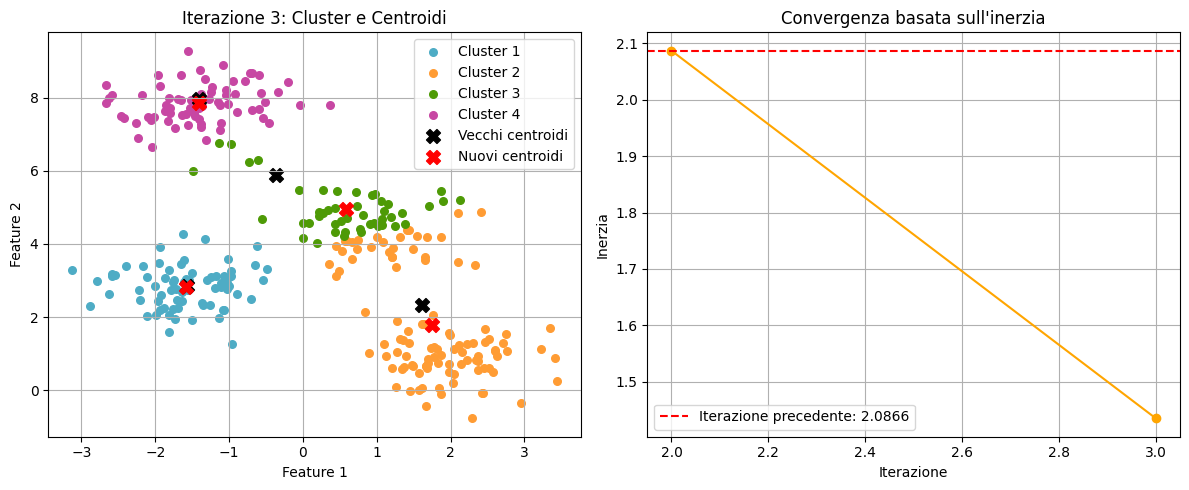

Iterazione 3, Inerzia: 1.435433, Variazione: 0.651164


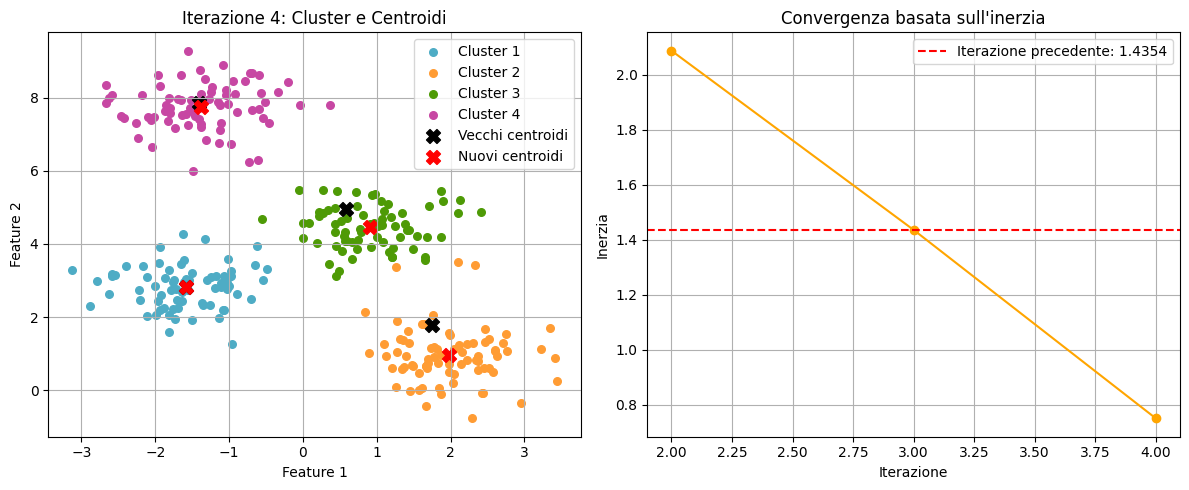

Iterazione 4, Inerzia: 0.750711, Variazione: 0.684722


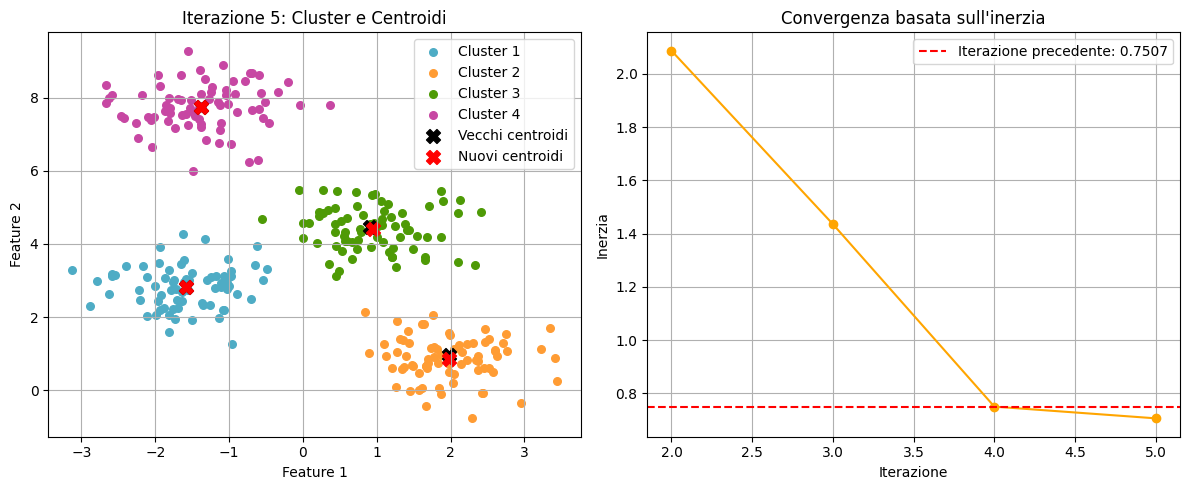

Iterazione 5, Inerzia: 0.706687, Variazione: 0.044025


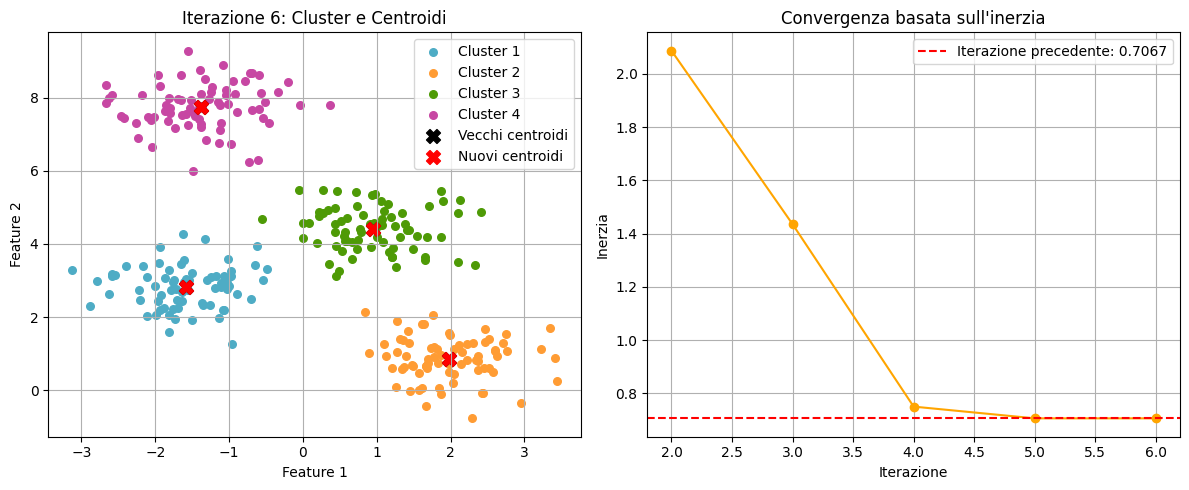

Iterazione 6, Inerzia: 0.706687, Variazione: 0.000000
Convergenza raggiunta all'iterazione 6: variazione dell'inerzia (0.000000) sotto la soglia (0.0001)!


In [18]:
# Calcoliamo l'inerzia iniziale
current_inertia = calculate_inertia(X, labels, centroids)
inertias = [current_inertia]  # Memorizziamo le inerzie per ogni iterazione

# Eseguiamo il ciclo per le iterazioni successive
for iteration in range(starting_iteration, max_iterations):
    # 9.2 Calcolo delle distanze e assegnazione ai cluster
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    # 9.3 Aggiornamento dei centroidi
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    # 9.4 Calcolo della nuova inerzia
    new_inertia = calculate_inertia(X, labels, new_centroids)
    inertia_change = abs(new_inertia - current_inertia)
    inertias.append(new_inertia)
    
    # 9.5 Visualizziamo lo stato attuale
    plt.figure(figsize=(12, 5))
    
    # Subplot per i cluster
    plt.subplot(1, 2, 1)
    for j in range(k):
        plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Vecchi centroidi')
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=100, c='red', label='Nuovi centroidi')
    
    plt.title(f'Iterazione {iteration}: Cluster e Centroidi')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    
    # Subplot per il grafico dell'inerzia
    plt.subplot(1, 2, 2)
    plt.plot(range(starting_iteration-1, iteration+1), inertias, 'o-', color='orange')
    plt.xlabel('Iterazione')
    plt.ylabel('Inerzia')
    plt.title('Convergenza basata sull\'inerzia')
    # Aggiungiamo una linea per la tolleranza della variazione
    if len(inertias) > 1:
        plt.axhline(y=inertias[-2], color='r', linestyle='--', 
                   label=f'Iterazione precedente: {inertias[-2]:.4f}')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Iterazione {iteration}, Inerzia: {new_inertia:.6f}, Variazione: {inertia_change:.6f}")
    
    # 9.6 Verifichiamo il criterio di arresto
    if inertia_change < tolerance:
        print(f"Convergenza raggiunta all'iterazione {iteration}: variazione dell'inerzia ({inertia_change:.6f}) sotto la soglia ({tolerance})!")
        break
    
    # 9.7 Aggiorniamo i centroidi e l'inerzia corrente per la prossima iterazione
    centroids = new_centroids.copy()
    current_inertia = new_inertia


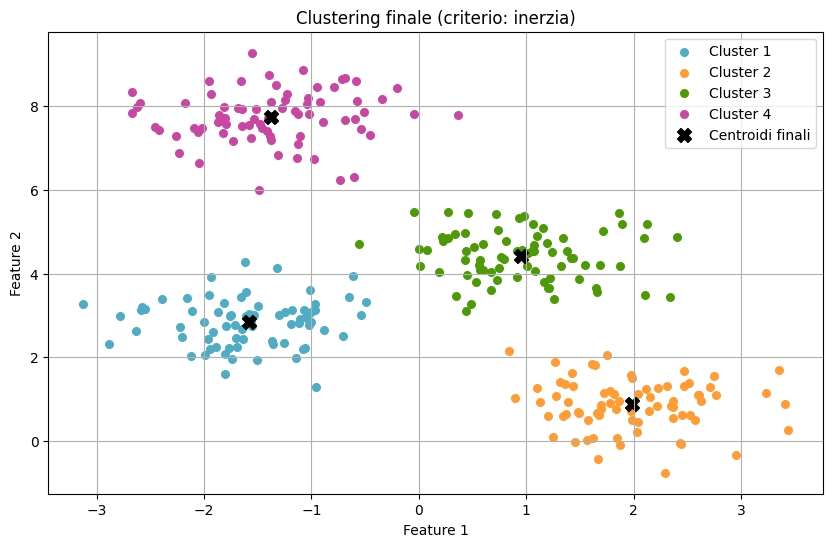

In [19]:
# 9.8 Visualizziamo il risultato finale
plt.figure(figsize=(10, 6))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='k', label='Centroidi finali')
plt.title(f'Clustering finale (criterio: inerzia)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


labels_inerzia = labels.copy()
centroids_inerzia = centroids.copy()
inertia_inerzia = new_inertia
iterazioni_inerzia = iteration - starting_iteration + 1

if 'inertia_movimento' not in locals():
    inertia_movimento = calculate_inertia(X, labels_movimento, centroids_movimento)
    
if 'inertia_assegnazioni' not in locals():
    inertia_assegnazioni = calculate_inertia(X, labels_assegnazioni, centroids_assegnazioni)

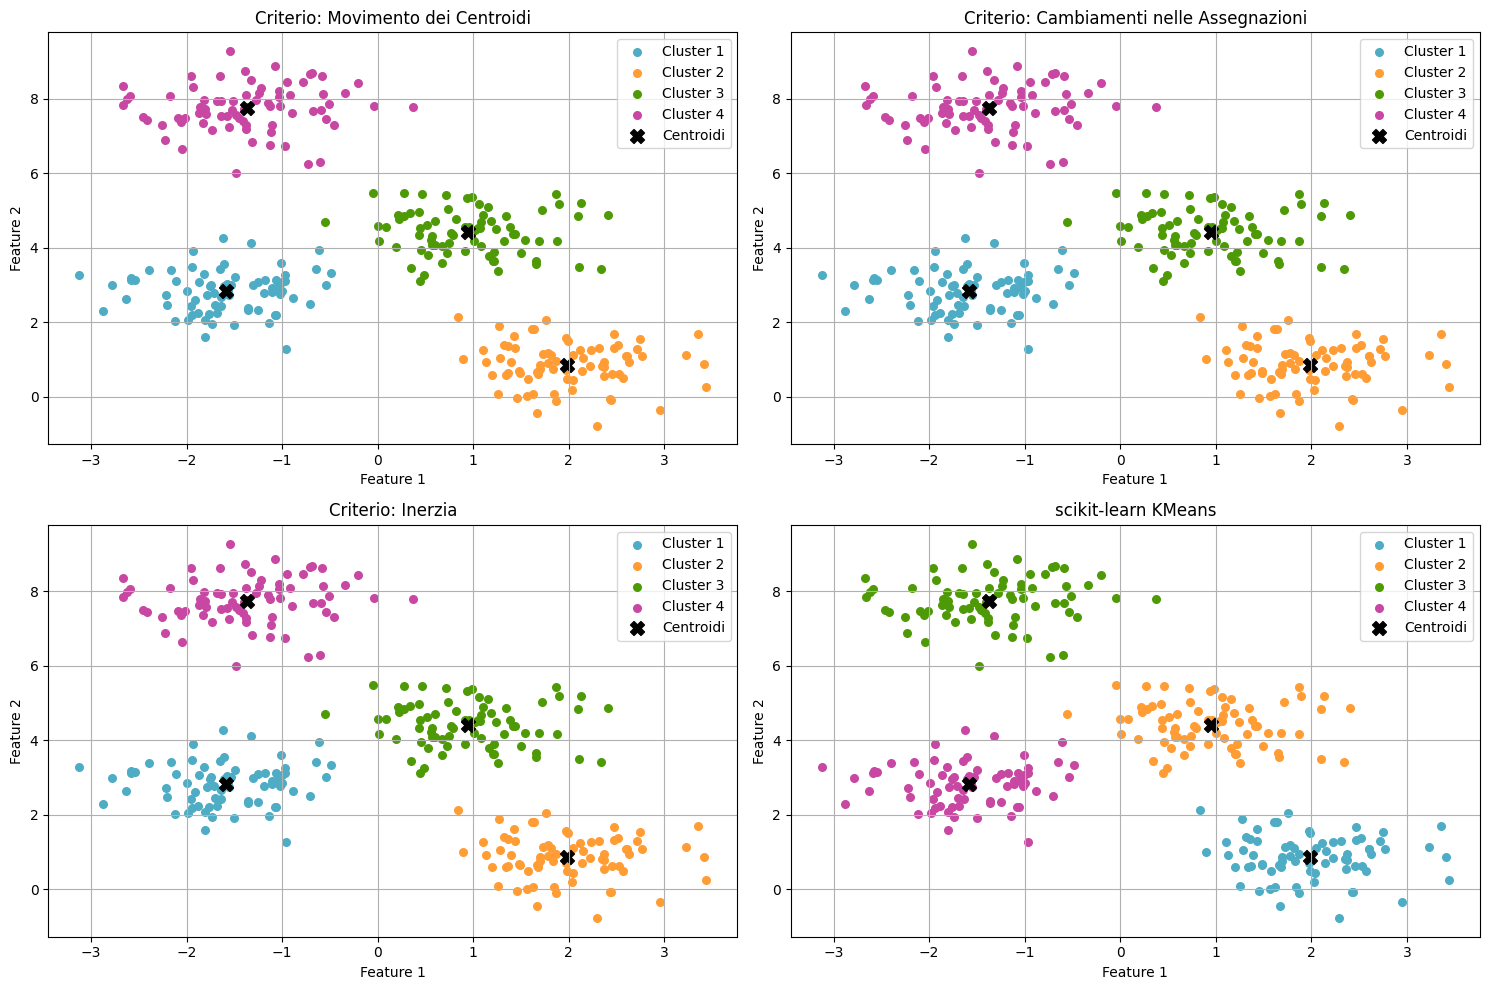


=== Confronto dei Diversi Criteri di Arresto ===
--------------------------------------------------------------------------------
Criterio                  | Iterazioni | Inerzia   
--------------------------------------------------------------------------------
Movimento dei Centroidi   | 4          | 0.706687  
Assegnazioni              | 4          | 0.706687  
Inerzia                   | 4          | 0.706687  
scikit-learn KMeans       | N/A        | 0.706687  
--------------------------------------------------------------------------------


In [20]:
# 10.1 Eseguiamo K-means con scikit-learn per avere un riferimento
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
sklearn_labels = kmeans.labels_
sklearn_centroids = kmeans.cluster_centers_
sklearn_inertia = kmeans.inertia_ / len(X)  # Normalizzato per confronto

# 10.2 Confrontiamo i risultati dei diversi criteri
plt.figure(figsize=(15, 10))

# Subplot per i cluster ottenuti con il criterio del movimento dei centroidi
plt.subplot(2, 2, 1)
for j in range(k):
    plt.scatter(X[labels_movimento == j, 0], X[labels_movimento == j, 1], 
               s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids_movimento[:, 0], centroids_movimento[:, 1], 
           marker='X', s=100, c='k', label='Centroidi')
plt.title('Criterio: Movimento dei Centroidi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot per i cluster ottenuti con il criterio dei cambiamenti nelle assegnazioni
plt.subplot(2, 2, 2)
for j in range(k):
    plt.scatter(X[labels_assegnazioni == j, 0], X[labels_assegnazioni == j, 1], 
               s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids_assegnazioni[:, 0], centroids_assegnazioni[:, 1], 
           marker='X', s=100, c='k', label='Centroidi')
plt.title('Criterio: Cambiamenti nelle Assegnazioni')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot per i cluster ottenuti con il criterio dell'inerzia
plt.subplot(2, 2, 3)
for j in range(k):
    plt.scatter(X[labels_inerzia == j, 0], X[labels_inerzia == j, 1], 
               s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(centroids_inerzia[:, 0], centroids_inerzia[:, 1], 
           marker='X', s=100, c='k', label='Centroidi')
plt.title('Criterio: Inerzia')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot per i cluster ottenuti con scikit-learn
plt.subplot(2, 2, 4)
for j in range(k):
    plt.scatter(X[sklearn_labels == j, 0], X[sklearn_labels == j, 1], 
               s=30, c=colors[j], label=f'Cluster {j+1}')
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], 
           marker='X', s=100, c='k', label='Centroidi')
plt.title('scikit-learn KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 10.3 Tabella riassuntiva
print("\n=== Confronto dei Diversi Criteri di Arresto ===")
print("-" * 80)
print(f"{'Criterio':<25} | {'Iterazioni':<10} | {'Inerzia':<10}")
print("-" * 80)
print(f"{'Movimento dei Centroidi':<25} | {iterazioni_movimento:<10} | {inertia_movimento:<10.6f}")
print(f"{'Assegnazioni':<25} | {iterazioni_assegnazioni:<10} | {inertia_assegnazioni:<10.6f}")
print(f"{'Inerzia':<25} | {iterazioni_inerzia:<10} | {inertia_inerzia:<10.6f}")
print(f"{'scikit-learn KMeans':<25} | {'N/A':<10} | {sklearn_inertia:<10.6f}")
print("-" * 80)

### Perché calcoliamo l'inerzia per ogni criterio? 


### L'inerzia ha 3 diversi ruoli in kmeans

#### 1. Criterio di Arresto

Come criterio di arresto, la variazione dell'inerzia tra iterazioni successive può essere utilizzata per determinare quando l'algoritmo ha raggiunto la convergenza. Quando questa variazione scende sotto una certa soglia di tolleranza, possiamo considerare l'algoritmo stabile e interrompere le iterazioni.


#### 2. Metrica di Valutazione della Qualità o Compattezza

L'inerzia è anche una delle principali metriche utilizzate per valutare la bontà del clustering. Essendo definita come la somma delle distanze quadratiche tra ogni punto e il centroide del suo cluster, l'inerzia misura quanto i cluster sono "compatti":

$$Inerzia = \frac{1}{N} \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2$$

Un valore di inerzia più basso indica che i punti sono mediamente più vicini ai loro centroidi, quindi i cluster sono più compatti.

#### 3. Uso dell'Inerzia per Scegliere k

Una delle applicazioni più comuni dell'inerzia come metrica di valutazione è la scelta del numero ottimale di cluster k.

 Quando aumentiamo k, l'inerzia tende naturalmente a diminuire (più cluster = distanze medie più corte). Questo porta al cosiddetto "metodo del gomito" (elbow method):

1. Eseguiamo K-means con diversi valori di k (ad esempio, da 1 a 10)
2. Plottiamo l'inerzia in funzione di k
3. Cerchiamo un "gomito" nel grafico, dove l'aggiunta di cluster extra non riduce più significativamente l'inerzia


### Limiti dell'Inerzia come Metrica

Sebbene utile, l'inerzia ha alcuni limiti come metrica di valutazione:

- Tende a favorire cluster sferici (poiché usa la distanza euclidea)
- Diminuisce sempre con l'aumentare di k, rendendo difficile la scelta del k ottimale
- Non tiene conto della separazione tra cluster, solo della compattezza interna

Per questo motivo, spesso si usano anche altre metriche come il coefficiente di silhouette, che tiene conto sia della compattezza interna ai cluster che della separazione tra cluster diversi.

Il coefficiente di silhouette varia da -1 a +1, dove:

- Valori vicini a +1 indicano che il punto è ben assegnato al suo cluster
- Valori vicini a 0 indicano che il punto è al confine tra due cluster
- Valori vicini a -1 indicano che il punto potrebbe essere assegnato al cluster sbagliato

La media dei coefficienti di silhouette per tutti i punti fornisce una misura globale della qualità del clustering.

### Coefficiente di Silhouette

Il coefficiente di silhouette è una metrica che valuta quanto bene un punto è stato assegnato al suo cluster rispetto agli altri cluster. Si basa su due misure fondamentali: la coesione (quanto un punto è vicino agli altri punti nel suo cluster) e la separazione (quanto un punto è lontano dai punti negli altri cluster).

## Definizione Matematica

Per un singolo punto xi, il coefficiente di silhouette s(i) è definito come:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Dove:

- **a(i)** è la distanza media tra xi e tutti gli altri punti nello stesso cluster (coesione)
- **b(i)** è la distanza media minima tra xi e tutti i punti nel cluster più vicino (separazione)


## Algoritmo Passo-Passo

### 1. Per ogni punto xi nel dataset:

#### a) Calcolare a(i) - coesione intra-cluster:

```
a(i) = media delle distanze tra xi e tutti gli altri punti nel suo cluster
```

#### b) Calcolare b(i) - separazione inter-cluster:

```
Per ogni altro cluster C ≠ cluster di xi:
    Calcolare d(i,C) = media delle distanze tra xi e tutti i punti in C
b(i) = minimo di tutti i d(i,C)
```

#### c) Calcolare il coefficiente di silhouette:

```
s(i) = (b(i) - a(i)) / max(a(i), b(i))
```

### 2. Il coefficiente di silhouette globale è la media di tutti i s(i):

```
S = (1/n) * somma di tutti gli s(i)
```

#### Interpretazione dei Valori

- **s(i) ≈ 1**: Il punto è ben clusterizzato (molto più vicino al suo cluster che ad altri)
- **s(i) ≈ 0**: Il punto è al confine tra due cluster
- **s(i) ≈ -1**: Il punto potrebbe essere stato assegnato al cluster sbagliato

#### Implementazione in Python

In [21]:
def silhouette_coefficient(X, labels):
    n_samples = len(X)
    n_clusters = len(set(labels))
    silhouette_vals = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Otteniamo il cluster del punto i
        cluster_i = labels[i]
        
        # Calcoliamo a(i) - coesione intra-cluster
        a_i = 0.0
        n_same_cluster = 0
        for j in range(n_samples):
            if i != j and labels[j] == cluster_i:
                a_i += np.linalg.norm(X[i] - X[j])
                n_same_cluster += 1
        
        if n_same_cluster > 0:
            a_i /= n_same_cluster
        
        # Calcoliamo b(i) - separazione inter-cluster
        b_i = float('inf')
        for cluster in set(labels):
            if cluster != cluster_i:
                b_i_cluster = 0.0
                n_other_cluster = 0
                for j in range(n_samples):
                    if labels[j] == cluster:
                        b_i_cluster += np.linalg.norm(X[i] - X[j])
                        n_other_cluster += 1
                
                if n_other_cluster > 0:
                    b_i_cluster /= n_other_cluster
                    b_i = min(b_i, b_i_cluster)
        
        # Calcoliamo il coefficiente di silhouette
        if n_same_cluster > 0:  # Evita divisione per zero
            silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i)
    
    return silhouette_vals

#### Facciamo un esempio

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import seaborn as sns

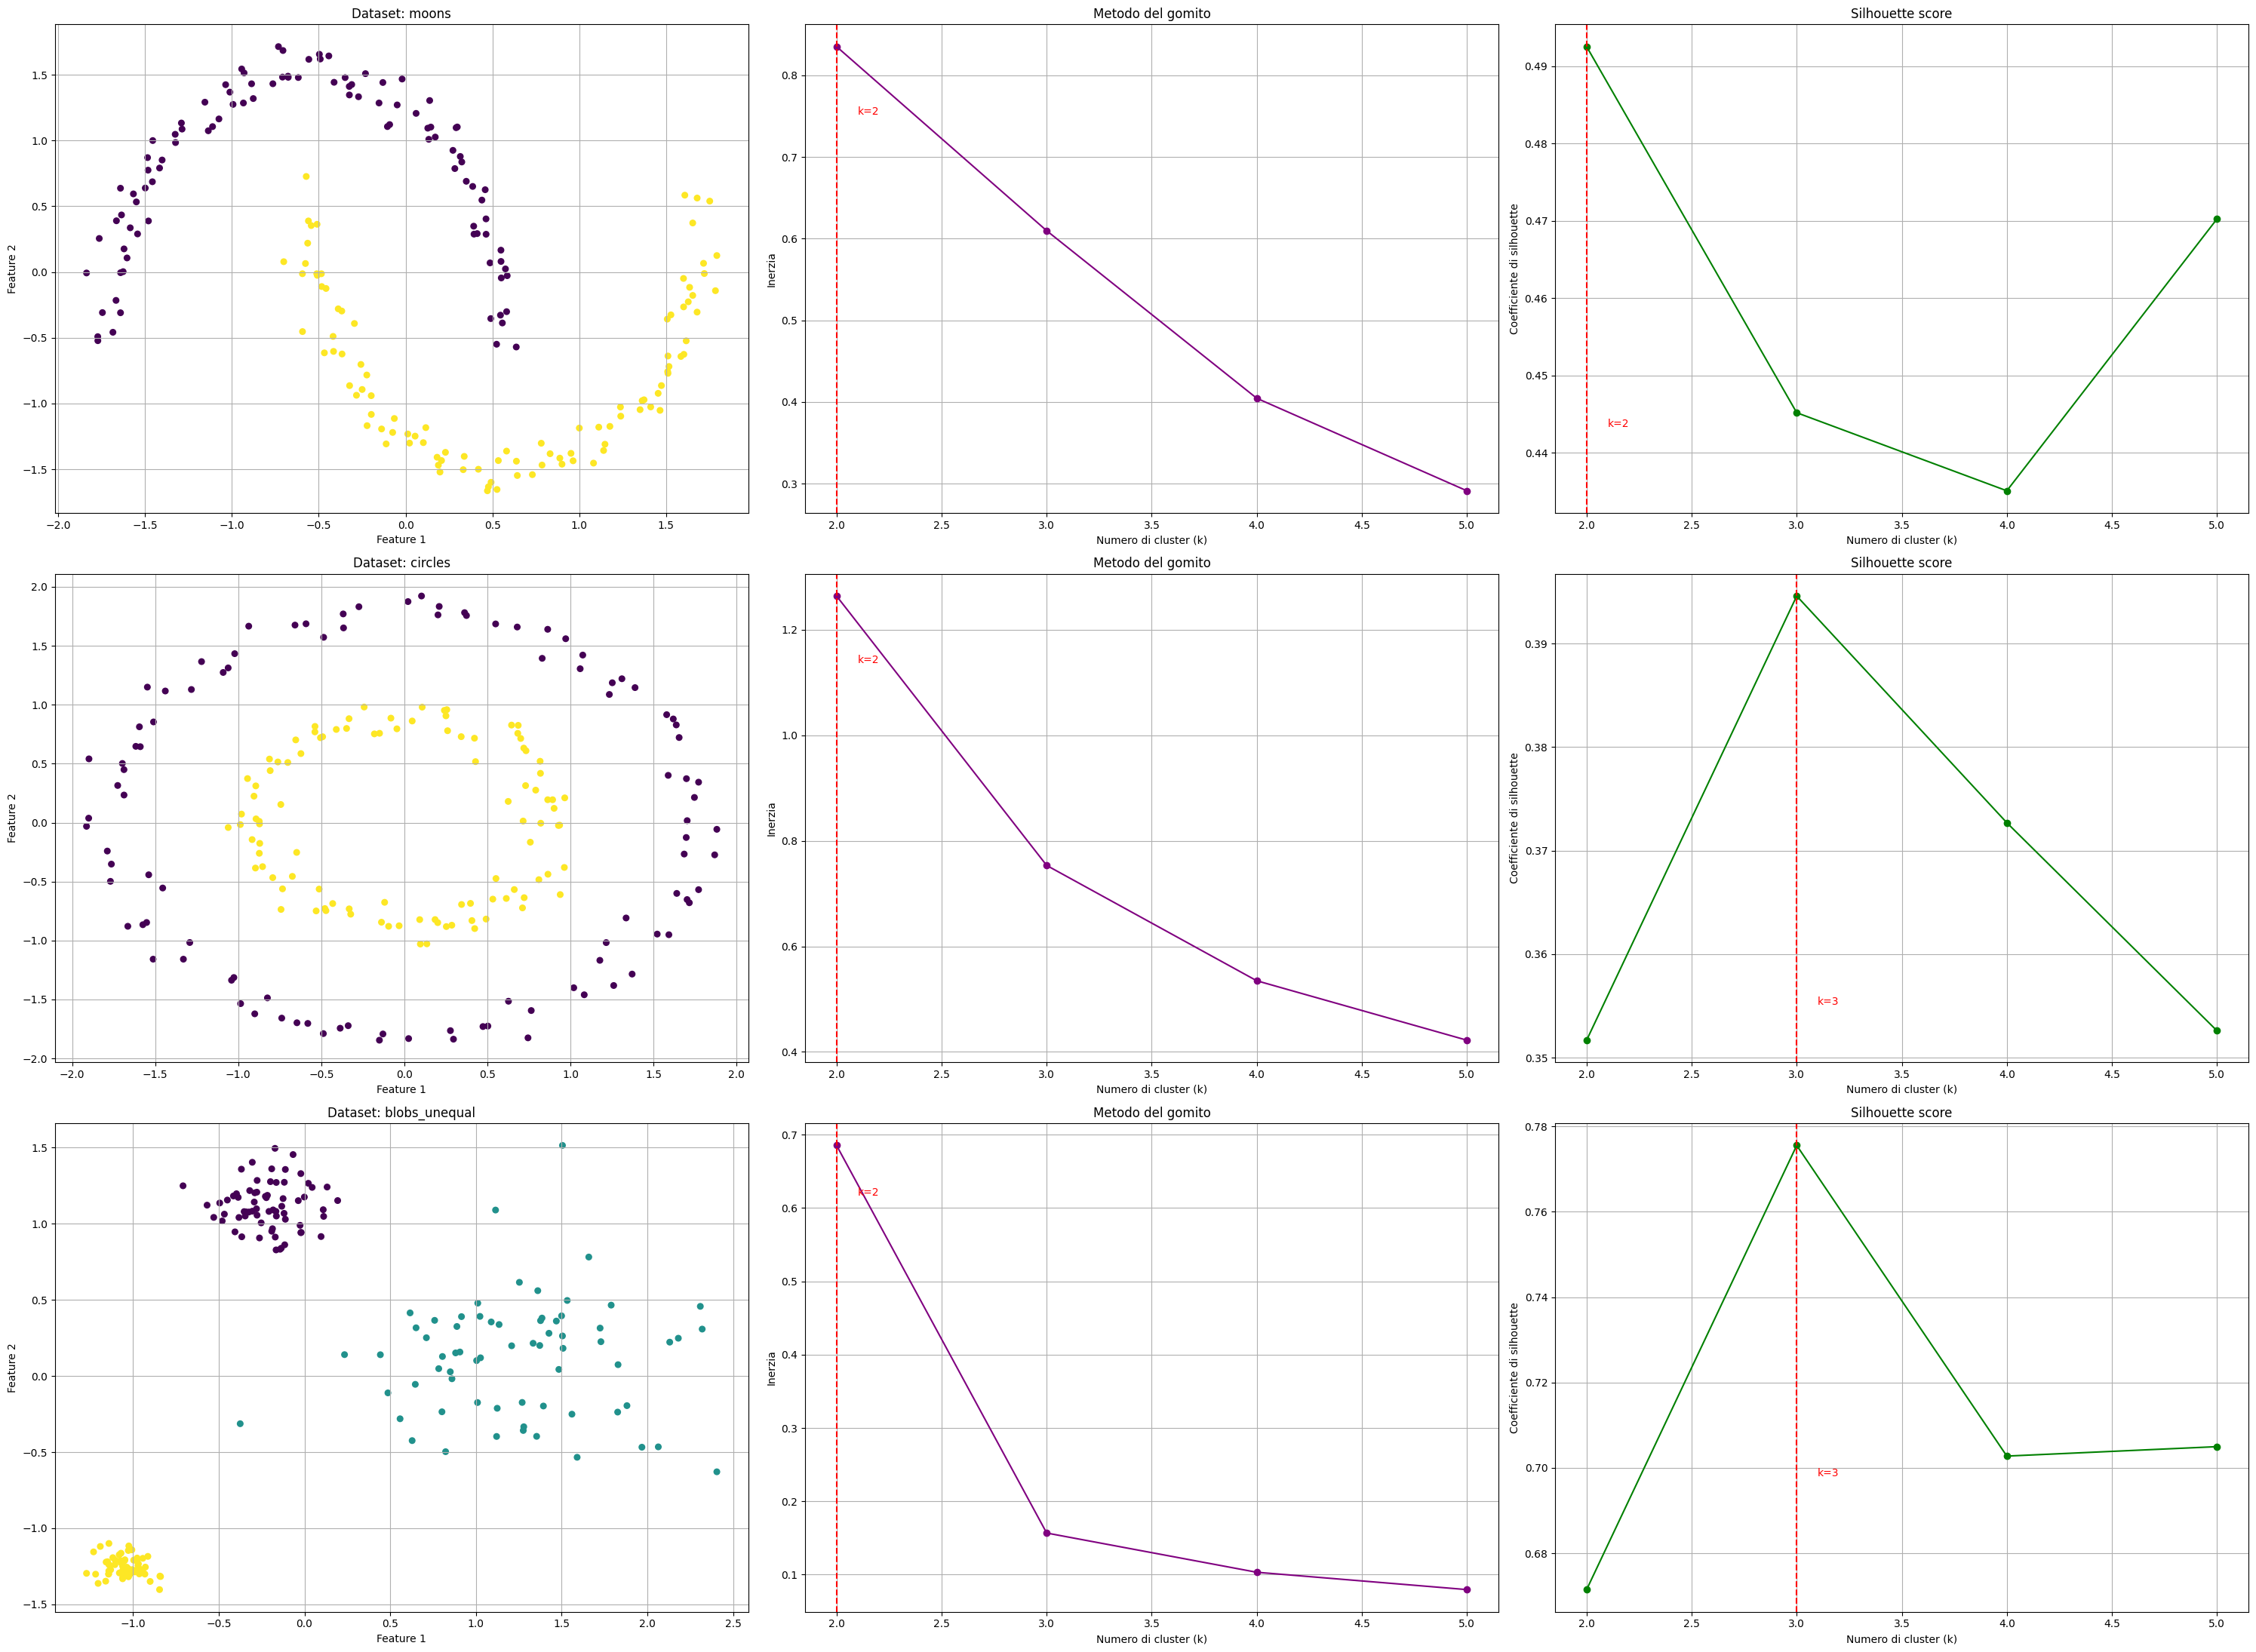

In [23]:
# Configuriamo il plot
plt.figure(figsize=(30, 22))

# Creiamo diversi dataset che sono difficili per K-means
datasets = {
    "moons": make_moons(n_samples=200, noise=0.05, random_state=42),
    "circles": make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42),
    "blobs_unequal": make_blobs(n_samples=200, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
}

# Colori per i plot
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#C747A3', '#1E90FF']

# Intervallo di k da testare
k_range = range(2, 6)
# Per ogni dataset
for i, (dataset_name, (X, y)) in enumerate(datasets.items()):
    # Standardizziamo i dati
    X = StandardScaler().fit_transform(X)
    
    # Prepariamo le liste per memorizzare inerzia e silhouette
    inertias = []
    silhouette_scores = []
    
    # Testiamo diversi valori di k
    for k in k_range:
        # Applichiamo K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # Calcoliamo e memorizziamo l'inerzia
        inertia = kmeans.inertia_ / len(X)  # Normalizzata
        inertias.append(inertia)
        
        # Calcoliamo e memorizziamo il coefficiente di silhouette
        # (solo se k > 1, poiché silhouette non è definita per k=1)
        if k > 1:
            silhouette_avg = silhouette_score(X, cluster_labels)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(0)
    
    # Visualizziamo i risultati per questo dataset
    
    # 1. Visualizziamo il dataset originale
    plt.subplot(3, 3, i*3 + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
    plt.title(f'Dataset: {dataset_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    
    # 2. Visualizziamo l'inerzia per diversi k
    plt.subplot(3, 3, i*3 + 2)
    plt.plot(k_range, inertias, 'o-', color='purple')
    plt.xlabel('Numero di cluster (k)')
    plt.ylabel('Inerzia')
    plt.title('Metodo del gomito')
    plt.grid(True)
    
    # Evidenziamo il k con inerzia minima (o il gomito, se possibile)
    elbow_k = 2  # Valore predefinito
    # Qui potremmo implementare un rilevamento automatico del gomito
    plt.axvline(x=elbow_k, color='r', linestyle='--')
    plt.text(elbow_k+0.1, max(inertias)*0.9, f'k={elbow_k}', color='r')
    
    # 3. Visualizziamo il coefficiente di silhouette per diversi k
    plt.subplot(3, 3, i*3 + 3)
    plt.plot(k_range, silhouette_scores, 'o-', color='green')
    plt.xlabel('Numero di cluster (k)')
    plt.ylabel('Coefficiente di silhouette')
    plt.title('Silhouette score')
    plt.grid(True)
    
    # Evidenziamo il k con silhouette massima
    best_k = k_range[np.argmax(silhouette_scores)]
    plt.axvline(x=best_k, color='r', linestyle='--')
    plt.text(best_k+0.1, max(silhouette_scores)*0.9, f'k={best_k}', color='r')

plt.tight_layout()
plt.show()

### Kmeans++, inizializzazione intelligente dei centroidi

K-means++ è un algoritmo di inizializzazione per K-means che risolve uno dei principali problemi dell'algoritmo standard: la scelta casuale dei centroidi iniziali.

#### Il problema dell'inizializzazione casuale

Nell'inizializzazione casuale standard:

- I centroidi iniziali vengono scelti completamente a caso
- Questo può causare centroidi troppo vicini tra loro
- Porta a convergenza lenta o a risultati di clustering sub-ottimali
- I risultati possono variare drasticamente tra diverse esecuzioni

## Come funziona K-means++

K-means++ utilizza un approccio probabilistico che distribuisce intelligentemente i centroidi iniziali:

1. **Primo centroide**: viene scelto casualmente tra i punti del dataset
2. **Centroidi successivi**: vengono scelti con probabilità proporzionale al quadrato della loro distanza dal centroide più vicino già scelto

In dettaglio:

```python
# Scegli il primo centroide casualmente
centroids[0] = X[random_index]

# Per ogni altro centroide
for c in range(1, k):
    # Calcola distanza minima di ogni punto dai centroidi esistenti
    min_distances = [distanza al centroide più vicino per ogni punto]
    
    # Scegli prossimo centroide con probabilità proporzionale al quadrato della distanza
    probabilities = min_distances² / sum(min_distances²)
    centroids[c] = X[scegli_punto_con_probabilità(probabilities)]
```

# Implementazione da Zero di K-means con Diverse Strategie di Arresto
Creiamo un'implementazione completa dell'algoritmo K-means da zero, incorporando diverse strategie per terminare le iterazioni. Poi svilupperemo una funzione che utilizza il nostro algoritmo per trovare il valore ottimale di k.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, silhouette_samples
import time

In [ ]:
class CustomKMeans:
    """
    Implementazione personalizzata dell'algoritmo K-means con diverse strategie di arresto
    """
    def __init__(self, n_clusters=3, max_iter=100, tol=0.0001, init_method='random', random_state=None):
        """
        Parametri:
        -----------
        n_clusters : int, default=3
            Numero di cluster da formare
        max_iter : int, default=100
            Numero massimo di iterazioni
        tol : float, default=0.0001
            Soglia di tolleranza per il criterio di convergenza
        init_method : str, default='random'
            Metodo di inizializzazione dei centroidi ('random' o 'kmeans++')
        random_state : int, default=None
            Seed per la generazione casuale
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.init_method = init_method
        self.random_state = random_state
        
        # Inizializzazione degli attributi che verranno riempiti dopo il fit
        self.centroids = None
        self.labels = None
        self.inertia = None
        self.n_iter = 0
        self.centroid_history = []
        self.label_history = []
        self.inertia_history = []
    
    def _initialize_centroids(self, X):
        """
        Inizializza i centroidi con il metodo specificato
        """
        n_samples, n_features = X.shape
        np.random.seed(self.random_state)
        
        if self.init_method == 'random':
            # Scelta casuale di n_clusters punti dal dataset
            idx = np.random.choice(n_samples, self.n_clusters, replace=False)
            centroids = X[idx]
        
        elif self.init_method == 'kmeans++':
            # Implementazione dell'inizializzazione k-means++
            centroids = np.zeros((self.n_clusters, n_features))
            
            # Scelta del primo centroide in modo casuale
            first_idx = np.random.choice(n_samples)
            centroids[0] = X[first_idx]
            
            # Scelta dei centroidi successivi
            for c in range(1, self.n_clusters):
                # Calcolo delle distanze minime da ogni punto ai centroidi esistenti
                min_dists = np.min([np.sum((X - cent) ** 2, axis=1) for cent in centroids[:c]], axis=0)
                
                # Probabilità proporzionale al quadrato della distanza
                probs = min_dists / min_dists.sum()
                
                # Scelta del prossimo centroide
                next_idx = np.random.choice(n_samples, p=probs)
                centroids[c] = X[next_idx]
        
        else:
            raise ValueError("Metodo di inizializzazione non supportato. Usare 'random' o 'kmeans++'")
            
        return centroids
    
    def _assign_clusters(self, X, centroids):
        """
        Assegna ogni punto al cluster più vicino
        """
        # Calcolo delle distanze tra ogni punto e ogni centroide
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assegnazione al cluster con distanza minima
        labels = np.argmin(distances, axis=0)
        
        return labels
    
    def _update_centroids(self, X, labels):
        """
        Aggiorna i centroidi come media dei punti in ogni cluster
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        for k in range(self.n_clusters):
            if np.sum(labels == k) > 0:  # Evita divisione per zero
                centroids[k] = np.mean(X[labels == k], axis=0)
            else:
                # Se un cluster è vuoto, reinizializza casualmente
                centroids[k] = X[np.random.choice(X.shape[0])]
                
        return centroids
    
    def _calculate_inertia(self, X, labels, centroids):
        """
        Calcola l'inerzia (somma dei quadrati delle distanze)
        """
        inertia = 0
        for i in range(X.shape[0]):
            cluster_idx = labels[i]
            inertia += np.sum((X[i] - centroids[cluster_idx])**2)
            
        return inertia / X.shape[0]  # Normalizzata per il numero di campioni
    
    def fit(self, X, stopping_criterion='centroid_movement'):
        """
        Esegue l'algoritmo K-means sul dataset X
        
        Parametri:
        -----------
        X : array-like, shape (n_samples, n_features)
            Dataset da clusterizzare
        stopping_criterion : str, default='centroid_movement'
            Criterio di arresto ('centroid_movement', 'label_changes', 'inertia', 'max_iter')
        
        Returns:
        --------
        self : object
            Istanza aggiornata
        """
        # Inizializzazione dei centroidi
        self.centroids = self._initialize_centroids(X)
        self.centroid_history.append(self.centroids.copy())
        
        # Assegnazione iniziale dei cluster
        self.labels = self._assign_clusters(X, self.centroids)
        self.label_history.append(self.labels.copy())
        
        # Calcolo dell'inerzia iniziale
        self.inertia = self._calculate_inertia(X, self.labels, self.centroids)
        self.inertia_history.append(self.inertia)
        
        # Iterazioni dell'algoritmo
        for iter_num in range(self.max_iter):
            self.n_iter = iter_num + 1
            
            # Salvataggio dello stato precedente
            prev_centroids = self.centroids.copy()
            prev_labels = self.labels.copy()
            prev_inertia = self.inertia
            
            # Aggiornamento dei centroidi
            self.centroids = self._update_centroids(X, self.labels)
            self.centroid_history.append(self.centroids.copy())
            
            # Riassegnazione dei cluster
            self.labels = self._assign_clusters(X, self.centroids)
            self.label_history.append(self.labels.copy())
            
            # Calcolo della nuova inerzia
            self.inertia = self._calculate_inertia(X, self.labels, self.centroids)
            self.inertia_history.append(self.inertia)
            
            # Verifica del criterio di arresto
            if stopping_criterion == 'centroid_movement':
                # Movimento dei centroidi
                movement = np.sum((self.centroids - prev_centroids)**2)
                if movement < self.tol:
                    break
                    
            elif stopping_criterion == 'label_changes':
                # Cambiamenti nelle assegnazioni
                label_changes = np.sum(self.labels != prev_labels)
                if label_changes == 0:
                    break
                    
            elif stopping_criterion == 'inertia':
                # Variazione dell'inerzia
                inertia_change = abs(self.inertia - prev_inertia)
                if inertia_change < self.tol:
                    break
                    
            elif stopping_criterion == 'max_iter':
                # Continua fino al numero massimo di iterazioni
                pass
                
            else:
                raise ValueError("Criterio di arresto non supportato")
        
        return self
    
    def predict(self, X):
        """
        Predice il cluster per ogni campione in X
        """
        return self._assign_clusters(X, self.centroids)
    
    def fit_predict(self, X, stopping_criterion='centroid_movement'):
        """
        Esegue fit e predict in un unico passaggio
        """
        self.fit(X, stopping_criterion)
        return self.labels
    
    def get_convergence_history(self):
        """
        Restituisce la storia della convergenza
        """
        return {
            'centroid_history': self.centroid_history,
            'label_history': self.label_history,
            'inertia_history': self.inertia_history,
            'n_iter': self.n_iter
        }

In [26]:
k = 4
kmeans = CustomKMeans(n_clusters=k, init_method="random")

In [27]:
criterion = "centroid_movement"
kmeans.fit(X, stopping_criterion=criterion)

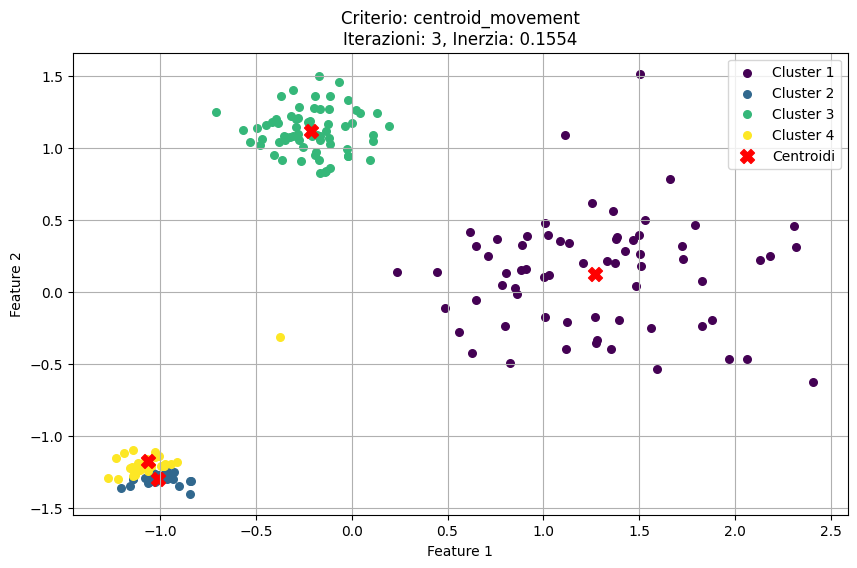

In [28]:
plt.figure(figsize=(10, 6))
# Plot dei cluster
labels = kmeans.labels
centroids = kmeans.centroids
colors = plt.cm.viridis(np.linspace(0, 1, k))

for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], 
                s=30, c=[colors[j]], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', s=100, c='red', label='Centroidi')

# Informazioni sul numero di iterazioni e inerzia
history = kmeans.get_convergence_history()
plt.title(f"Criterio: {criterion}\nIterazioni: {history['n_iter']}, Inerzia: {kmeans.inertia:.4f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Applichiamo un init_method smart

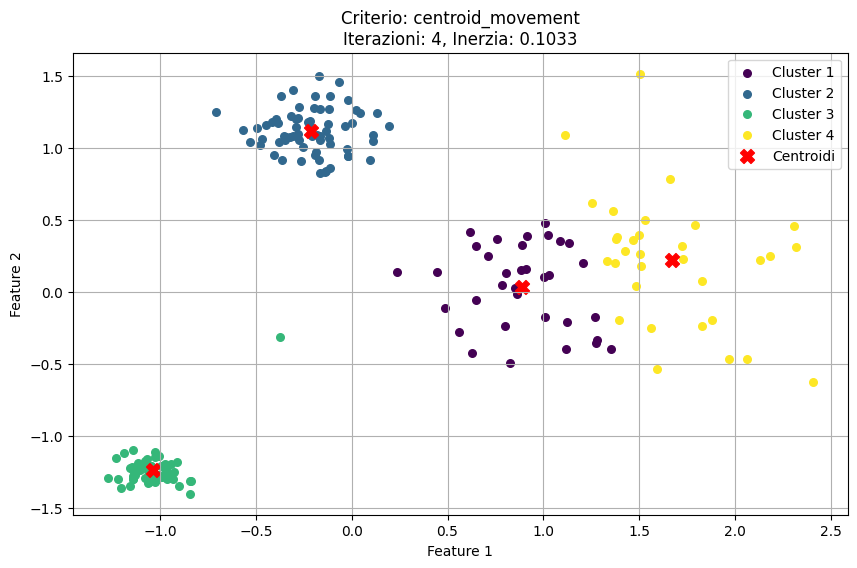

In [29]:
k = 4
kmeans = CustomKMeans(n_clusters=k, init_method="kmeans++")
criterion = "centroid_movement"
kmeans.fit(X, stopping_criterion=criterion)
plt.figure(figsize=(10, 6))
# Plot dei cluster
labels = kmeans.labels
centroids = kmeans.centroids
colors = plt.cm.viridis(np.linspace(0, 1, k))

for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], 
                s=30, c=[colors[j]], label=f'Cluster {j+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='X', s=100, c='red', label='Centroidi')

# Informazioni sul numero di iterazioni e inerzia
history = kmeans.get_convergence_history()
plt.title(f"Criterio: {criterion}\nIterazioni: {history['n_iter']}, Inerzia: {kmeans.inertia:.4f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import pandas as pd

# Definiamo i parametri da testare
n_clusters = 4
init_methods = ['random', 'kmeans++']
stopping_criteria = ['centroid_movement', 'label_changes', 'inertia', 'max_iter']

# Creiamo una lista per memorizzare i risultati
results = []

# Eseguiamo i test
for init_method in init_methods:
    for stopping_criterion in stopping_criteria:
        # Creiamo e fittiamo il modello
        kmeans = CustomKMeans(n_clusters=n_clusters, init_method=init_method)
        kmeans.fit(X, stopping_criterion=stopping_criterion)
        
        # Estraiamo i risultati
        inertia = kmeans.inertia
        n_iter = kmeans.n_iter
        
        # Aggiungiamo i risultati alla lista
        results.append({
            'init_method': init_method,
            'stopping_criterion': stopping_criterion,
            'inertia': inertia,
            'n_iter': n_iter
        })

# Creiamo un DataFrame da visualizzare
df_results = pd.DataFrame(results)
print(df_results)

  init_method stopping_criterion   inertia  n_iter
0      random  centroid_movement  0.150661       8
1      random      label_changes  0.103885      13
2      random            inertia  0.154527       3
3      random           max_iter  0.103265     100
4    kmeans++  centroid_movement  0.108530       4
5    kmeans++      label_changes  0.103885       6
6    kmeans++            inertia  0.103265       8
7    kmeans++           max_iter  0.108720     100


#### Troviamo il miglior k rendendo automatica la scelta fra elbow o silouhette

In [31]:
def find_optimal_k(X, k_range=range(2, 11), method='both', n_init=5, stopping_criterion='centroid_movement', 
                  init_method='kmeans++', random_state=None, plot=True):
    """
    Trova il numero ottimale di cluster k utilizzando il metodo del gomito e/o il coefficiente di silhouette
    
    Parametri:
    -----------
    X : array-like, shape (n_samples, n_features)
        Dataset da clusterizzare
    k_range : iterable, default=range(2, 11)
        Intervallo di valori k da testare
    method : str, default='both'
        Metodo da utilizzare ('elbow', 'silhouette', 'both')
    n_init : int, default=5
        Numero di inizializzazioni per ogni k
    stopping_criterion : str, default='centroid_movement'
        Criterio di arresto per K-means
    init_method : str, default='kmeans++'
        Metodo di inizializzazione dei centroidi
    random_state : int, default=None
        Seed per la generazione casuale
    plot : bool, default=True
        Se True, visualizza i grafici
        
    Returns:
    --------
    best_k_elbow : int o None
        Miglior k secondo il metodo del gomito (se method == 'elbow' o 'both')
    best_k_silhouette : int o None
        Miglior k secondo il coefficiente di silhouette (se method == 'silhouette' o 'both')
    results : dict
        Dizionario con i risultati per ogni k
    """
    results = {
        'k_values': list(k_range),
        'inertias': [],
        'silhouette_scores': [],
        'best_models': {},
        'timings': []
    }
    
    for k in k_range:
        print(f"Analisi con k={k}...")
        
        # Inizializziamo variabili per tenere traccia del miglior modello per questo k
        best_inertia = float('inf')
        best_silhouette = -1
        best_model = None
        total_time = 0
        
        for init in range(n_init):
            # Misuriamo il tempo di esecuzione
            start_time = time.time()
            
            # Eseguiamo K-means
            kmeans = CustomKMeans(n_clusters=k, init_method=init_method, 
                                 random_state=random_state+init if random_state else None)
            kmeans.fit(X, stopping_criterion)
            
            end_time = time.time()
            run_time = end_time - start_time
            total_time += run_time
            
            # Calcoliamo l'inerzia
            inertia = kmeans.inertia
            
            # Calcoliamo il coefficiente di silhouette (solo se k >= 2)
            silhouette = silhouette_score(X, kmeans.labels) if k >= 2 else 0
            
            # Aggiorniamo il miglior modello per questo k
            if method == 'elbow' and inertia < best_inertia:
                best_inertia = inertia
                best_model = kmeans
            elif method == 'silhouette' and silhouette > best_silhouette:
                best_silhouette = silhouette
                best_model = kmeans
            elif method == 'both':
                # Per 'both', diamo priorità alla silhouette
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_inertia = inertia
                    best_model = kmeans
                elif silhouette == best_silhouette and inertia < best_inertia:
                    best_inertia = inertia
                    best_model = kmeans
        
        # Memorizza i risultati per questo k
        results['inertias'].append(best_inertia)
        results['silhouette_scores'].append(best_silhouette if k >= 2 else 0)
        results['best_models'][k] = best_model
        results['timings'].append(total_time / n_init)  # Tempo medio
    
    # Trova il k ottimale secondo il metodo del gomito (usando la "second derivative")
    best_k_elbow = None
    if method in ['elbow', 'both']:
        inertias = np.array(results['inertias'])
        if len(inertias) >= 3:  # Servono almeno 3 punti per calcolare la derivata seconda
            # Calcola la derivata prima
            d1_inertias = np.diff(inertias)
            # Calcola la derivata seconda
            d2_inertias = np.diff(d1_inertias)
            # Il k ottimale è dove la derivata seconda è massima
            # (aggiungiamo 2 perché: +1 per l'indice di d2 e +1 perché k parte da 2)
            best_k_elbow = np.argmax(np.abs(d2_inertias)) + 2
    
    # Trova il k ottimale secondo il coefficiente di silhouette
    best_k_silhouette = None
    if method in ['silhouette', 'both']:
        silhouette_scores = np.array(results['silhouette_scores'])
        if len(silhouette_scores) > 0:
            # Il k ottimale è dove il coefficiente di silhouette è massimo
            best_k_silhouette = k_range[np.argmax(silhouette_scores)]
    
    # Visualizza i risultati
    if plot:
        plt.figure(figsize=(15, 10))
        
        if method in ['elbow', 'both']:
            plt.subplot(2, 2, 1)
            plt.plot(k_range, results['inertias'], 'o-', color='purple')
            if best_k_elbow:
                plt.axvline(x=best_k_elbow, color='r', linestyle='--')
                plt.text(best_k_elbow+0.1, min(results['inertias']) + 0.8*(max(results['inertias'])-min(results['inertias'])), 
                        f'k={best_k_elbow}', color='r')
            plt.xlabel('Numero di cluster (k)')
            plt.ylabel('Inerzia')
            plt.title('Metodo del gomito')
            plt.grid(True)
        
        if method in ['silhouette', 'both']:
            plt.subplot(2, 2, 2)
            plt.plot(k_range[1:], results['silhouette_scores'][1:], 'o-', color='green')  # Escludiamo k=1
            if best_k_silhouette:
                plt.axvline(x=best_k_silhouette, color='r', linestyle='--')
                plt.text(best_k_silhouette+0.1, min(results['silhouette_scores'][1:]) + 
                        0.8*(max(results['silhouette_scores'][1:])-min(results['silhouette_scores'][1:])), 
                        f'k={best_k_silhouette}', color='r')
            plt.xlabel('Numero di cluster (k)')
            plt.ylabel('Coefficiente di silhouette')
            plt.title('Silhouette score')
            plt.grid(True)
        
        # Plot dei tempi di esecuzione
        plt.subplot(2, 2, 3)
        plt.plot(k_range, results['timings'], 'o-', color='blue')
        plt.xlabel('Numero di cluster (k)')
        plt.ylabel('Tempo medio (secondi)')
        plt.title('Tempo di esecuzione')
        plt.grid(True)
        
        # Visualizziamo il clustering con il k ottimale
        if method == 'elbow' and best_k_elbow:
            k_to_show = best_k_elbow
        elif method == 'silhouette' and best_k_silhouette:
            k_to_show = best_k_silhouette
        elif method == 'both' and best_k_silhouette:
            k_to_show = best_k_silhouette
        else:
            k_to_show = k_range[0]
        
        plt.subplot(2, 2, 4)
        best_model = results['best_models'][k_to_show]
        labels = best_model.labels
        centroids = best_model.centroids
        
        # Plot dei cluster con colori diversi
        colors = plt.cm.viridis(np.linspace(0, 1, k_to_show))
        for j in range(k_to_show):
            plt.scatter(X[labels == j, 0], X[labels == j, 1], 
                       s=30, c=[colors[j]], label=f'Cluster {j+1}')
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                   marker='X', s=100, c='red', label='Centroidi')
        plt.title(f'Clustering con k={k_to_show}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Se abbiamo calcolato la silhouette, visualizziamola per il k ottimale
        if method in ['silhouette', 'both'] and best_k_silhouette:
            plt.figure(figsize=(10, 6))
            # Calcoliamo i coefficienti di silhouette per ogni punto
            best_model = results['best_models'][best_k_silhouette]
            labels = best_model.labels
            silhouette_vals = silhouette_samples(X, labels)
            
            # Organizziamo per cluster
            y_ticks = []
            y_lower, y_upper = 0, 0
            
            for i in range(best_k_silhouette):
                # Estragliamo i coefficienti di silhouette per questo cluster
                cluster_silhouette_vals = silhouette_vals[labels == i]
                cluster_silhouette_vals.sort()
                
                y_upper += len(cluster_silhouette_vals)
                
                color = colors[i]
                plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, 
                        height=1.0, edgecolor='none', color=color)
                
                # Etichetta del cluster
                plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
                
                y_lower += len(cluster_silhouette_vals)
            
            # Media del coefficiente di silhouette
            avg_silhouette = np.mean(silhouette_vals)
            plt.axvline(x=avg_silhouette, color="red", linestyle="--", 
                       label=f'Media silhouette: {avg_silhouette:.3f}')
            
            plt.title(f'Silhouette per k={best_k_silhouette}')
            plt.xlabel('Coefficiente di silhouette')
            plt.ylabel('Cluster label')
            plt.legend(loc="lower right")
            plt.yticks([])
            plt.xlim([-0.1, 1])
            plt.grid(True)
            plt.show()
    
    # Restituisce i risultati
    if method == 'elbow':
        return best_k_elbow, results
    elif method == 'silhouette':
        return best_k_silhouette, results
    else:  # 'both'
        return best_k_elbow, best_k_silhouette, results

Analisi con k=2...
Analisi con k=3...
Analisi con k=4...
Analisi con k=5...
Analisi con k=6...
Analisi con k=7...
Analisi con k=8...
Analisi con k=9...


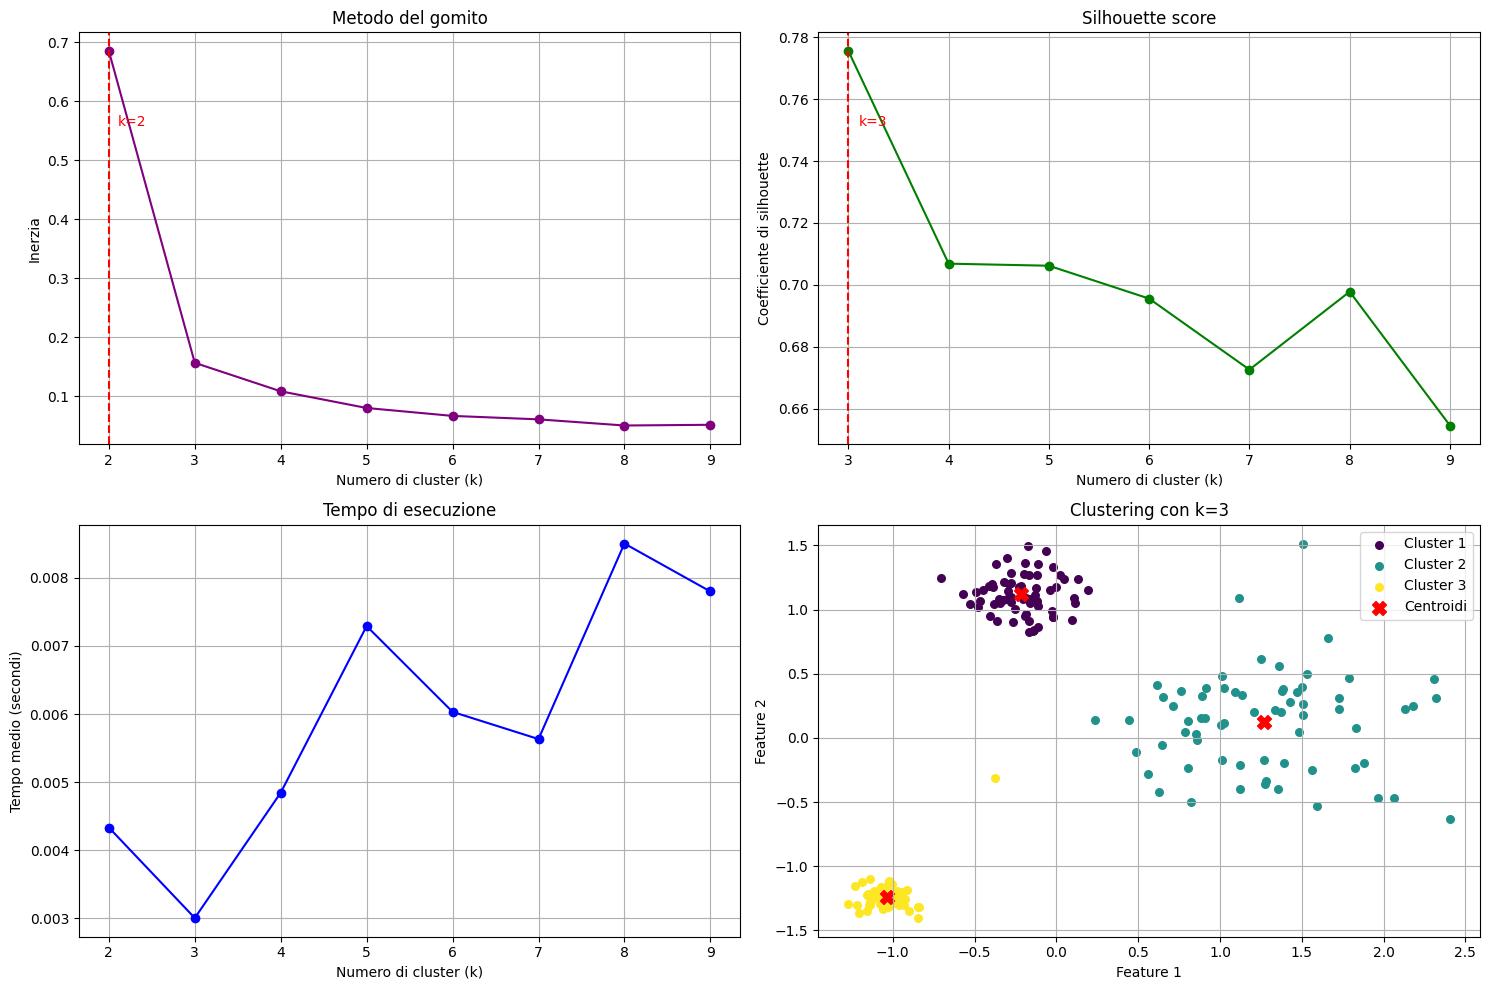

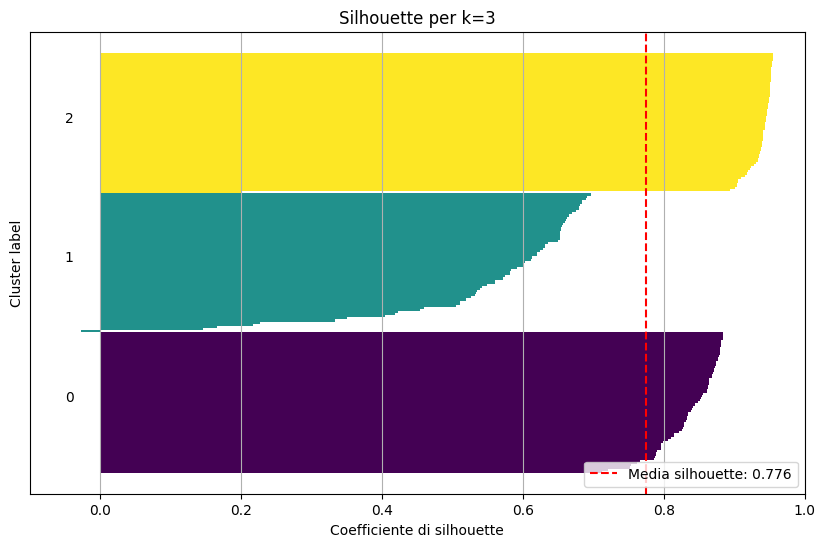

Miglior k secondo il metodo del gomito: 2
Miglior k secondo il coefficiente di silhouette: 3


In [32]:
# Troviamo il k ottimale
best_k_elbow, best_k_silhouette, results = find_optimal_k(
    X, k_range=range(2, 10), method='both', n_init=3, 
    stopping_criterion='centroid_movement', init_method='kmeans++', 
    random_state=42, plot=True
)

print(f"Miglior k secondo il metodo del gomito: {best_k_elbow}")
print(f"Miglior k secondo il coefficiente di silhouette: {best_k_silhouette}")